# Project-3 Housing Price Prediction 

In [1]:
#importing Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("train_housing.csv")
df_test=pd.read_csv("housing_test.csv")

In [3]:
df_train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
df_test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [5]:
df_train.shape

(1168, 81)

In [6]:
df_test.shape

(292, 80)

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [11]:
#dropping the unneccery columns
df_train.drop("Id",axis=1,inplace=True)

In [12]:
#dropping the unneccery columns
df_test.drop("Id",axis=1,inplace=True)

In [13]:
#checking the shape if trainning data
print(df_train.shape)
#looking the first 5 rows of trainning data
df_train.head()

(1168, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

In [14]:
#checking the shape if trainning data
print(df_test.shape)
#looking the first 5 rows of trainning data
df_test.head()

(292, 79)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL         86.0    14157   Pave   NaN      IR1   
1         120       RL          NaN     5814   Pave   NaN      IR1   
2          20       RL          NaN    11838   Pave   NaN      Reg   
3          70       RL         75.0    12000   Pave   NaN      Reg   
4          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         HLS    AllPub    Corner  ...           0        0    NaN   NaN   
1         Lvl    AllPub   CulDSac  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Bnk    AllPub    Inside  ...           0        0    NaN   NaN   
4         Lvl    AllPub   CulDSac  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       7    2007        WD         Normal  
1         NaN       0       8    2009       COD        Abnorml  
2         NaN       0       6    2009        WD         Normal  
3         NaN       0       7    2009        WD         Normal  
4         NaN       0       1    2008        WD         Normal  

[5 rows x 79 columns]

# EDA FOR TRAIN DATASET

In [15]:
df_train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [16]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0         120       RL          NaN     4928   Pave   NaN      IR1   
1          20       RL         95.0    15865   Pave   NaN      IR1   
2          60       RL         92.0     9920   Pave   NaN      IR1   
3          20       RL        105.0    11751   Pave   NaN      IR1   
4          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2007        WD         Normal     128000  
1       0     10    2007        WD         Normal     268000  
2       0      6    2007        WD         Normal     269790  
3       0      1    2010       COD         Normal     190000  
4       0      6    2009        WD         Normal     215000  

[5 rows x 80 columns]

# Checking Null Values

In [17]:
df_train.isnull().values.any()

True

Null value is present here

In [18]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Here we can't see that how many columns have null values lets check that via heatmap

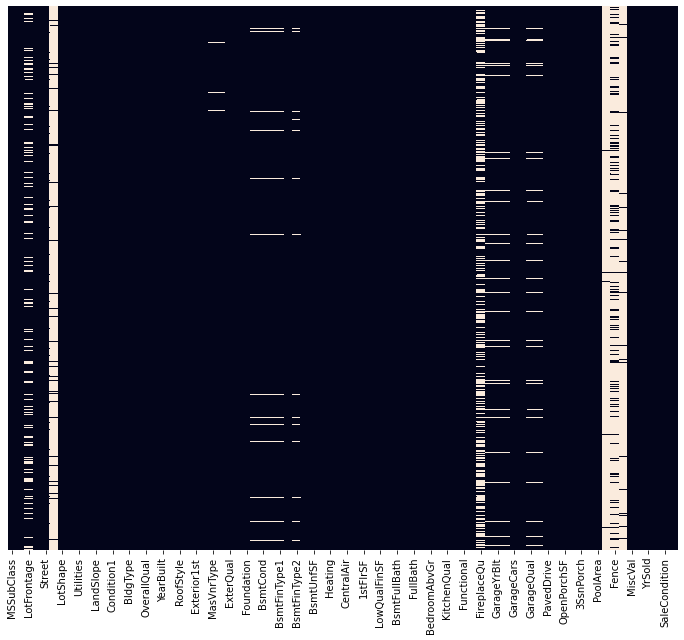

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)
plt.show()

Now we can clearly identify that there is lots of Null values present in the Dataset

In [20]:
def Handling_Nan(df):
    N=df_train.columns
    for i in N:
        if df[i].dtype!='object':
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [21]:
#calling the Function
Handling_Nan(df_train)

In [22]:
#checking the Null values Again
df_train.isnull().values.any()

False

Now we have cleared all the Null values

# Checking the correlation

In [23]:
dfcor=df_train.corr()
dfcor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336681 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336681     1.000000  0.299452     0.229218    -0.047573   
LotArea         -0.124151     0.299452  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229218  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047573  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.112655  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.088799  0.027228     0.555945     0.080669   
MasVnrArea       0.027813     0.188758  0.121086     0.407230    -0.137475   
BsmtFinSF1      -0.052236     0.228996  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.002159  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.113924  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.356107  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.403436  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.089675  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007506 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.374251  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.094046  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001389  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.171773  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.047816  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.237199  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002729 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.318771  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.230610  0.285983     0.390067    -0.013632   
GarageYrBlt      0.073130     0.055992 -0.034765     0.511482    -0.301881   
GarageCars      -0.027639     0.260252  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.322644  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.088334  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.151328  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.020902 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.051084  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.030405  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.196001  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.001329  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.022517  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.003885 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.323779  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.023988      0.056618    0.027813   -0.052236   -0.062403   
LotFrontage     0.112655      0.088799    0.188758    0.228996    0.002159   
LotArea         0.005506      0.027228    0.121086    0.221851    0.056656   
OverallQual     0.575800      0.555945    0.407230    0.219643   -0.040893   
OverallCond    -0.377731      0.080669   -0.137475   -0.028810    0.044336   
YearBuilt       1.000000      0.592829    0.321905    0.227933   -0.027682   
YearRemodAdd    0.592829      1.000000    0.181385    0.114430   -0.044694   
MasVnrArea      0.321905      0.181385    1.000000    0.265735   -0.065707   
BsmtFinSF1      0.227933      0.114430    0.265735    1.000000   -0.052145   
BsmtFinSF2     -0.027682     -0.044694   -0.065707   -0.052145    1.000000   
BsmtUnfSF       0.155559      0.174732    0.109562   -0.499861   -0.213580   
TotalBsmtSF     0.386265      0.280720    0.365016    0.518940    0.098167   
1stFlrSF        0.279450      0.2333

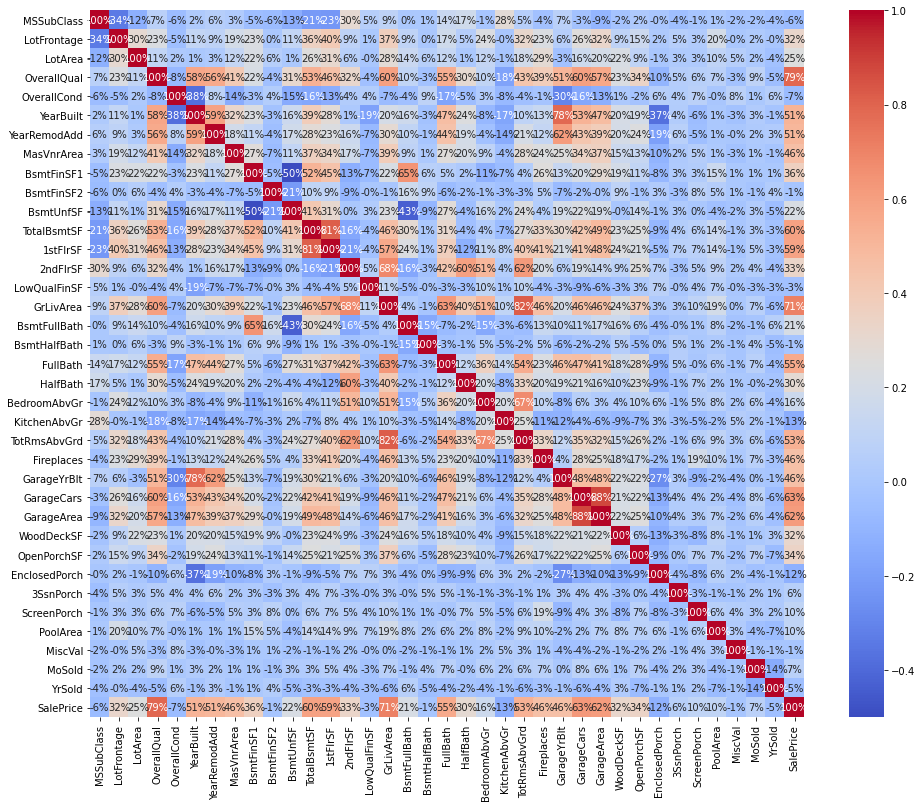

In [24]:
#Lets plot the correlation with heatmap
plt.figure(figsize=(16,13))
sns.heatmap(dfcor,annot=True,cmap="coolwarm",fmt='.0%')
plt.show()

Mostly column  are negatively corelate to each other.

# UNIVARIATE ANALYSIS

Let's take categorical column

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


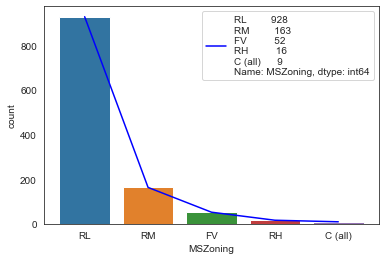

*******************************************************************************


Pave    1164
Grvl       4
Name: Street, dtype: int64


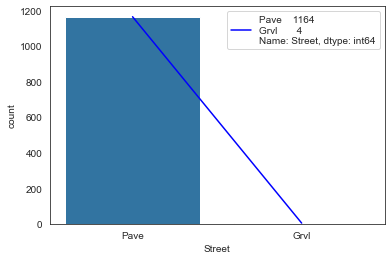

*******************************************************************************


Grvl    1132
Pave      36
Name: Alley, dtype: int64


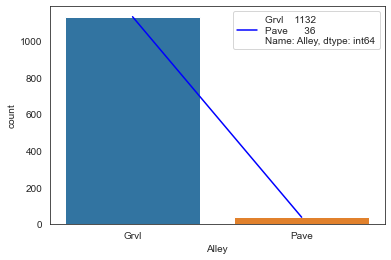

*******************************************************************************


Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


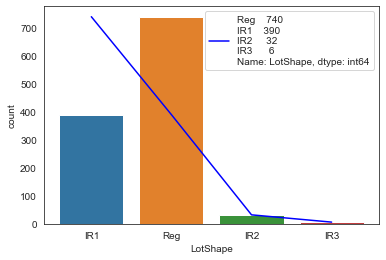

*******************************************************************************


Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


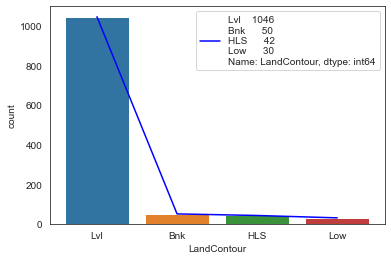

*******************************************************************************


AllPub    1168
Name: Utilities, dtype: int64


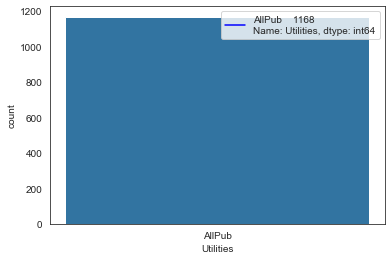

*******************************************************************************


Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


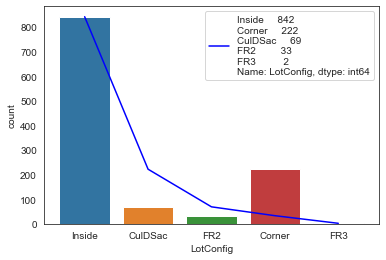

*******************************************************************************


Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


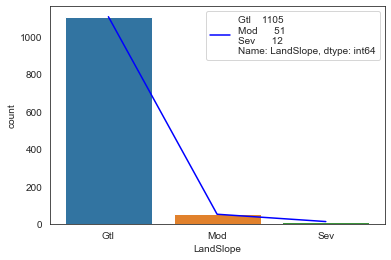

*******************************************************************************


NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


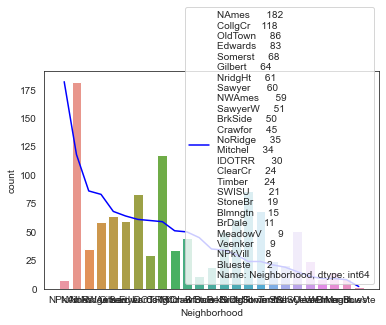

*******************************************************************************


Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


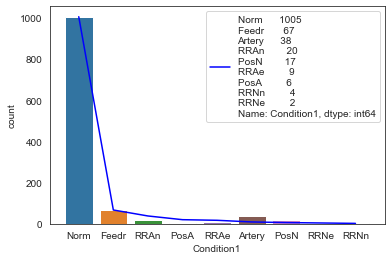

*******************************************************************************


Norm      1154
Feedr        6
Artery       2
PosN         2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64


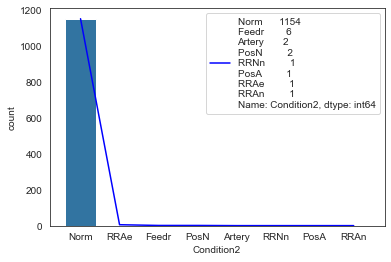

*******************************************************************************


1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


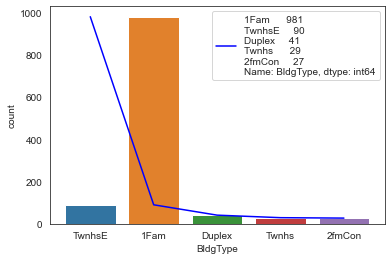

*******************************************************************************


1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


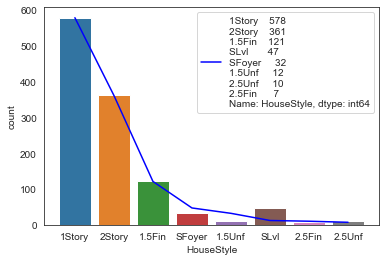

*******************************************************************************


Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


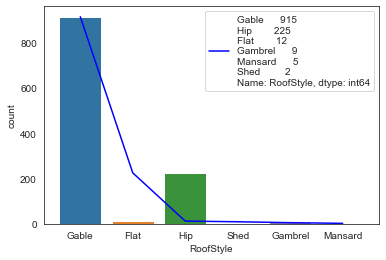

*******************************************************************************


CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
ClyTile       1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64


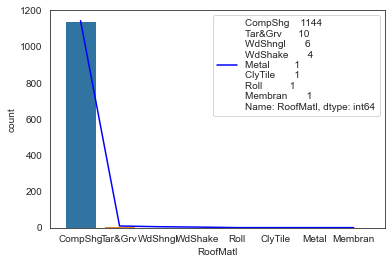

*******************************************************************************


VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
BrkComm      1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64


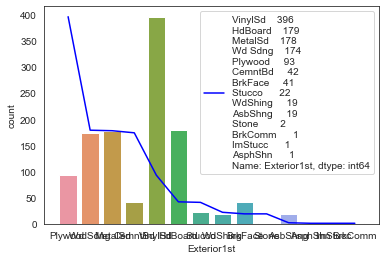

*******************************************************************************


VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


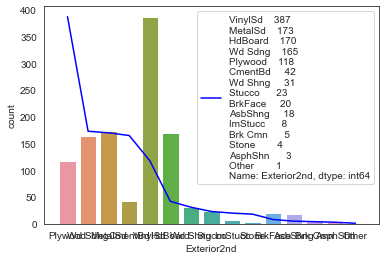

*******************************************************************************


None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


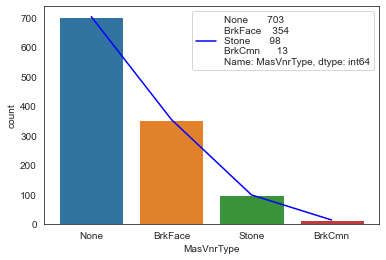

*******************************************************************************


TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


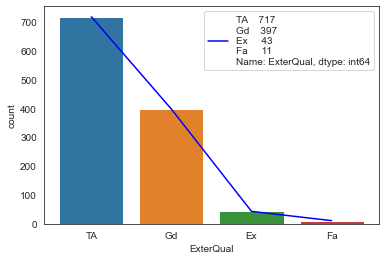

*******************************************************************************


TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


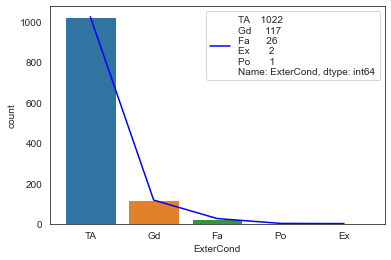

*******************************************************************************


CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


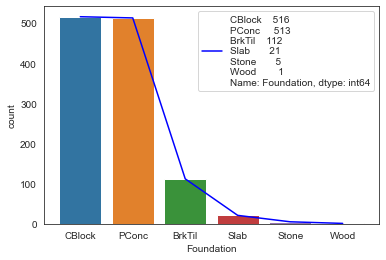

*******************************************************************************


TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


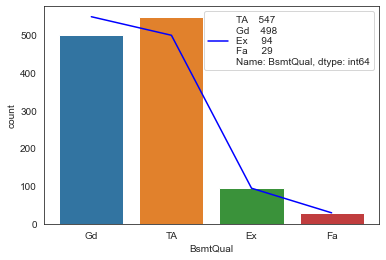

*******************************************************************************


TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


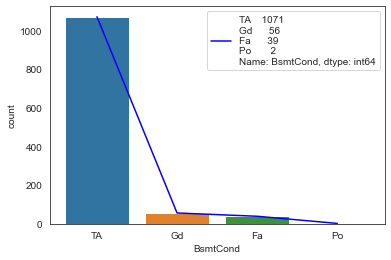

*******************************************************************************


No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


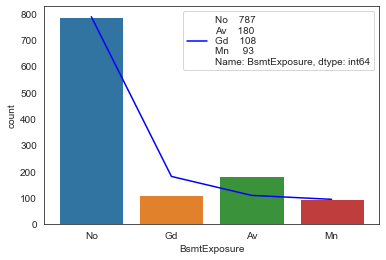

*******************************************************************************


Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


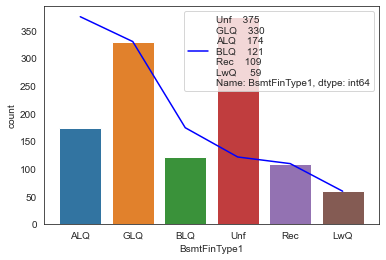

*******************************************************************************


Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


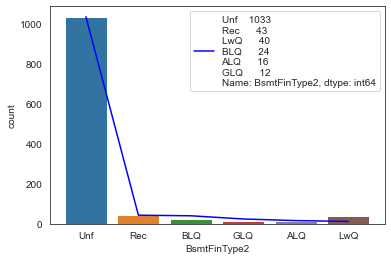

*******************************************************************************


GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64


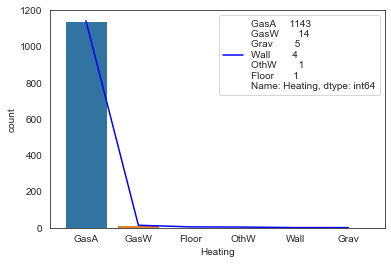

*******************************************************************************


Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


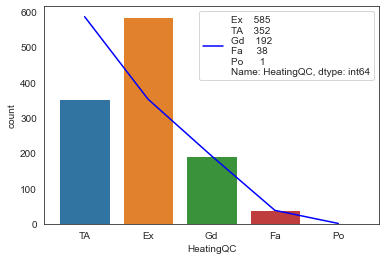

*******************************************************************************


Y    1090
N      78
Name: CentralAir, dtype: int64


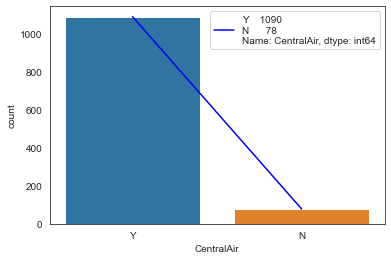

*******************************************************************************


SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


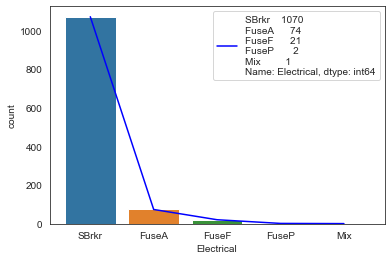

*******************************************************************************


TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


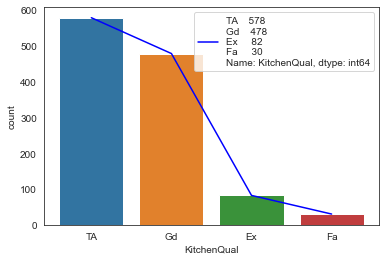

*******************************************************************************


Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


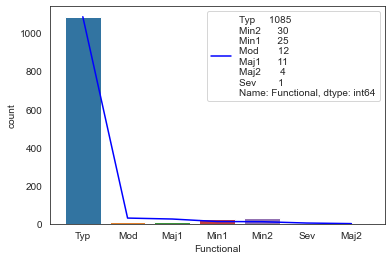

*******************************************************************************


Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64


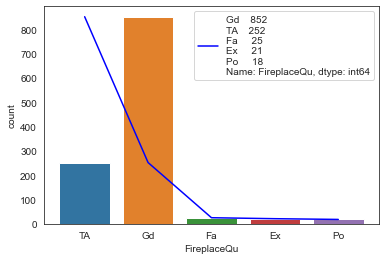

*******************************************************************************


Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


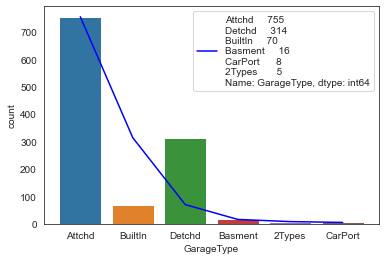

*******************************************************************************


Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


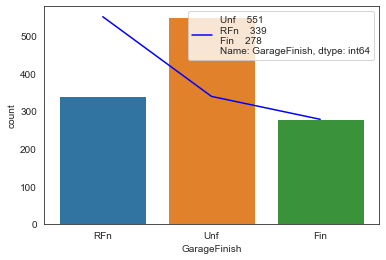

*******************************************************************************


TA    1114
Fa      39
Gd      11
Po       2
Ex       2
Name: GarageQual, dtype: int64


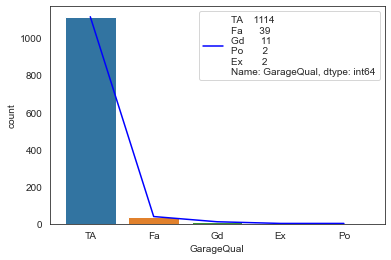

*******************************************************************************


TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


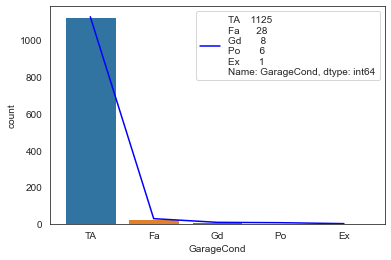

*******************************************************************************


Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


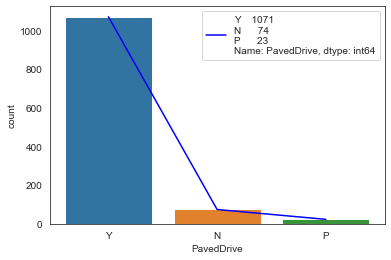

*******************************************************************************


Gd    1164
Fa       2
Ex       2
Name: PoolQC, dtype: int64


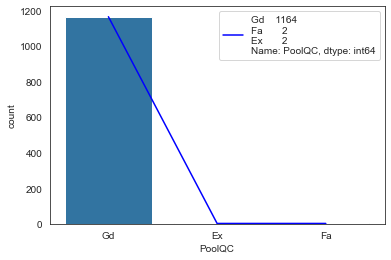

*******************************************************************************


MnPrv    1060
GdPrv      51
GdWo       47
MnWw       10
Name: Fence, dtype: int64


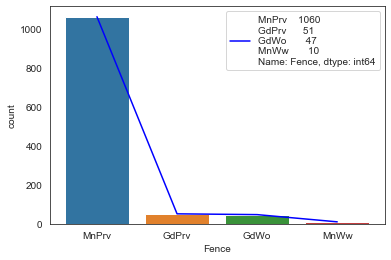

*******************************************************************************


Shed    1164
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64


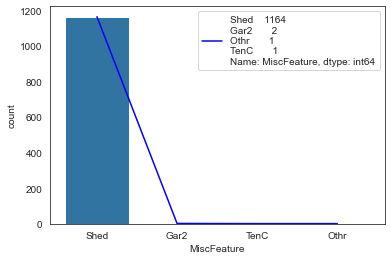

*******************************************************************************


WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64


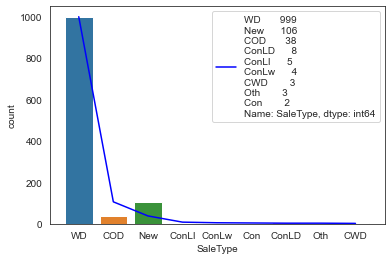

*******************************************************************************


Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


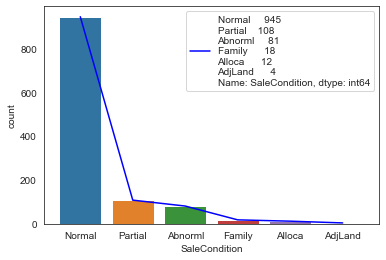

*******************************************************************************




In [25]:
def value_counts(data):
    s=df_train.columns
    for i in s:
        if df_train[i].dtype=='object':
            sns.set_style('white')  #darkgrid
            a=df_train[i].value_counts()
            print(a)
            sns.countplot(x=df_train[i],data=df_train)
            plt.plot(a,color='b',label=a)
            plt.legend()
            plt.show()
            print("*******************************************************************************")
            print('\n')

value_counts(df_train)

Let's take numerical data

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


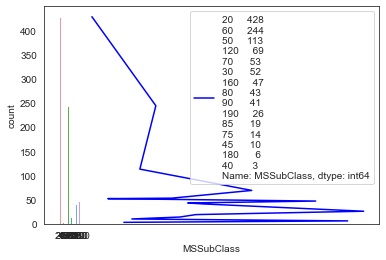

*******************************************************************************


70.98847     214
60.00000     111
80.00000      60
70.00000      58
75.00000      46
            ... 
160.00000      1
124.00000      1
39.00000       1
106.00000      1
149.00000      1
Name: LotFrontage, Length: 107, dtype: int64


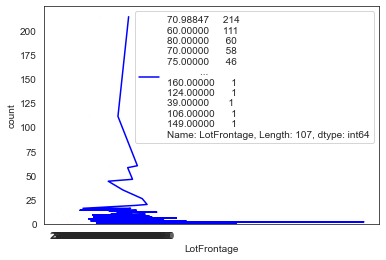

*******************************************************************************


9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64


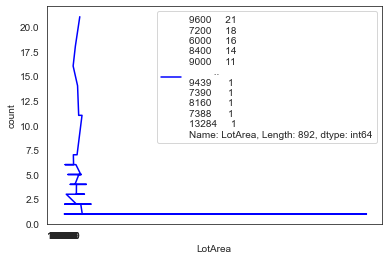

*******************************************************************************


5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


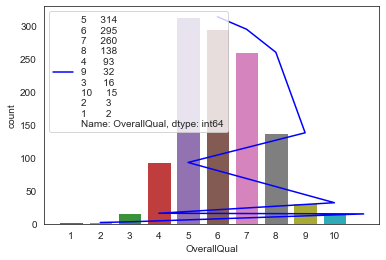

*******************************************************************************


5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1      1
Name: OverallCond, dtype: int64


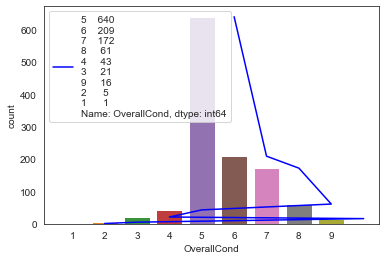

*******************************************************************************


2006    57
2005    51
2007    41
2004    37
2003    33
        ..
1913     1
1917     1
1927     1
1989     1
1875     1
Name: YearBuilt, Length: 110, dtype: int64


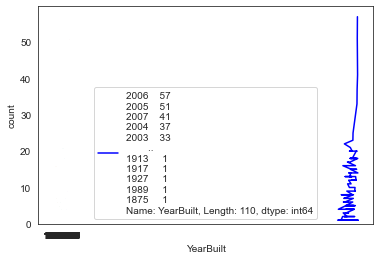

*******************************************************************************


1950    146
2006     82
2007     64
2005     57
2004     46
       ... 
2010      5
1974      4
1983      4
1952      4
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64


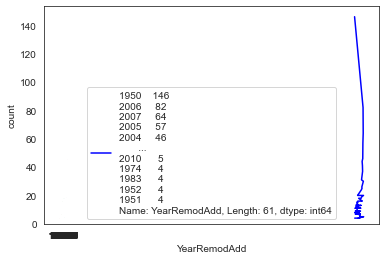

*******************************************************************************


0.000000      692
102.310078      7
72.000000       7
120.000000      6
180.000000      6
             ... 
67.000000       1
571.000000      1
975.000000      1
275.000000      1
137.000000      1
Name: MasVnrArea, Length: 284, dtype: int64


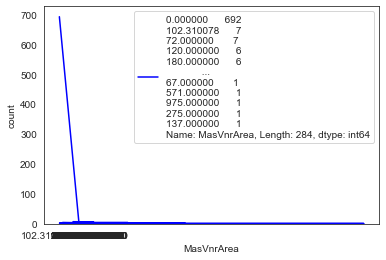

*******************************************************************************


0       375
24       10
16        8
20        5
616       5
       ... 
781       1
787       1
795       1
803       1
1904      1
Name: BsmtFinSF1, Length: 551, dtype: int64


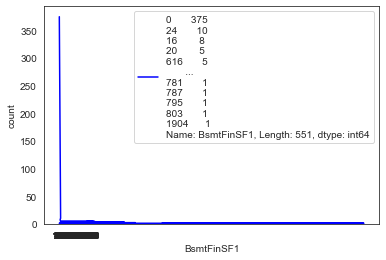

*******************************************************************************


0      1032
180       5
374       2
290       2
182       2
       ... 
547       1
551       1
580       1
606       1
362       1
Name: BsmtFinSF2, Length: 122, dtype: int64


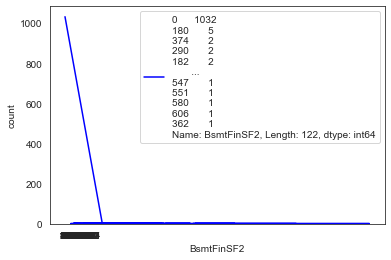

*******************************************************************************


0       97
728      8
270      6
300      6
440      6
        ..
538      1
542      1
543      1
1063     1
2046     1
Name: BsmtUnfSF, Length: 681, dtype: int64


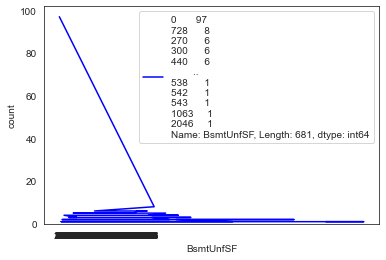

*******************************************************************************


0       30
864     28
912     13
672     13
816     12
        ..
1459     1
1454     1
1444     1
1437     1
2046     1
Name: TotalBsmtSF, Length: 636, dtype: int64


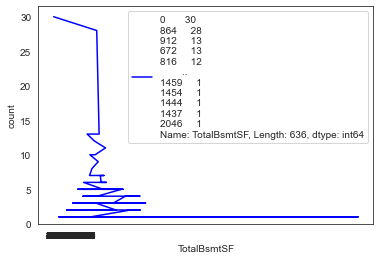

*******************************************************************************


864     19
1040    13
912     12
894     10
848      9
        ..
1516     1
1085     1
1512     1
1507     1
2046     1
Name: 1stFlrSF, Length: 669, dtype: int64


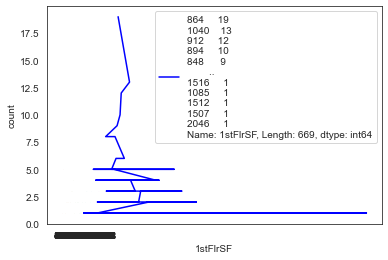

*******************************************************************************


0       663
728       9
504       7
600       6
546       6
       ... 
1134      1
1141      1
788       1
787       1
1872      1
Name: 2ndFlrSF, Length: 351, dtype: int64


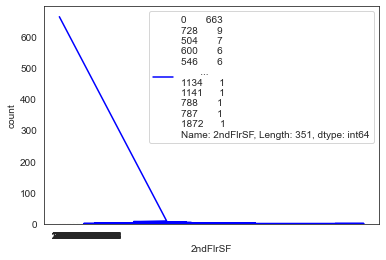

*******************************************************************************


0      1145
80        3
360       2
371       1
53        1
120       1
144       1
156       1
232       1
234       1
572       1
528       1
390       1
392       1
420       1
473       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64


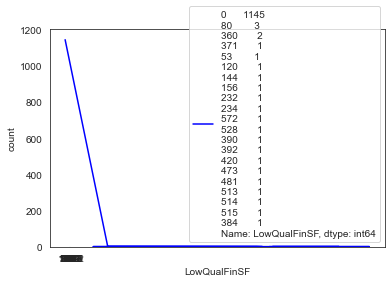

*******************************************************************************


864     16
1040    11
894     10
1456     9
1200     8
        ..
1471     1
1469     1
1468     1
1459     1
2054     1
Name: GrLivArea, Length: 746, dtype: int64


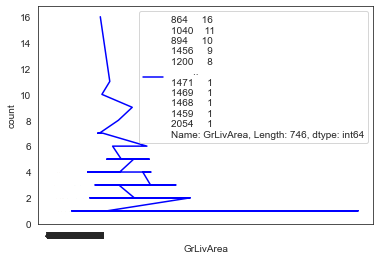

*******************************************************************************


0    686
1    468
2     13
3      1
Name: BsmtFullBath, dtype: int64


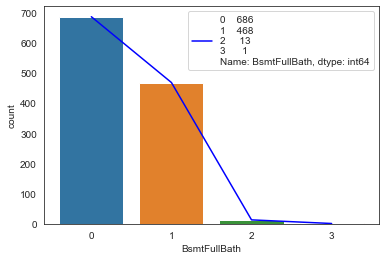

*******************************************************************************


0    1105
1      61
2       2
Name: BsmtHalfBath, dtype: int64


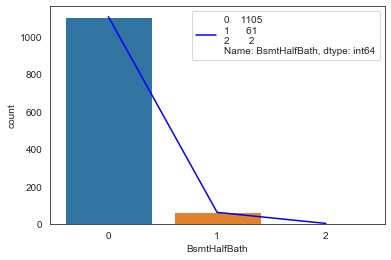

*******************************************************************************


2    610
1    524
3     27
0      7
Name: FullBath, dtype: int64


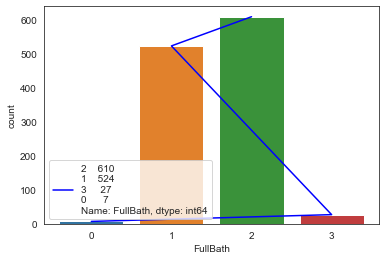

*******************************************************************************


0    724
1    434
2     10
Name: HalfBath, dtype: int64


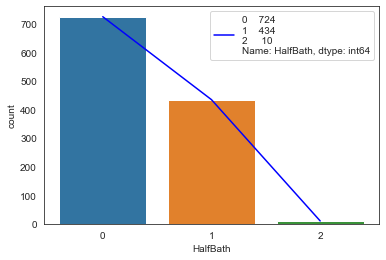

*******************************************************************************


3    640
2    281
4    180
1     39
5     18
6      5
0      4
8      1
Name: BedroomAbvGr, dtype: int64


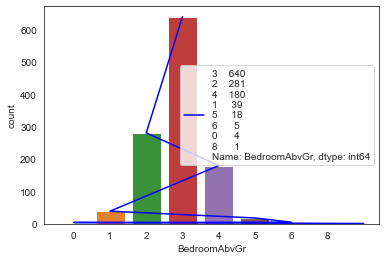

*******************************************************************************


1    1114
2      52
3       1
0       1
Name: KitchenAbvGr, dtype: int64


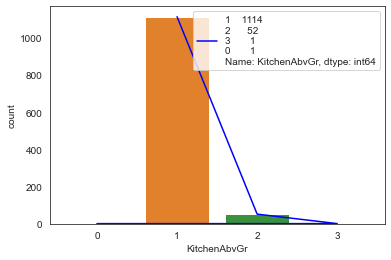

*******************************************************************************


6     325
7     268
5     217
8     148
4      72
9      65
10     41
11     13
3      11
12      6
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64


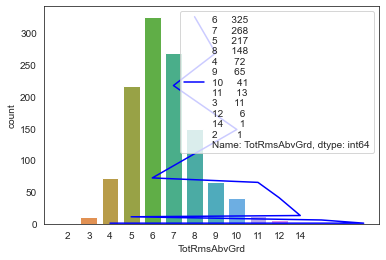

*******************************************************************************


0    551
1    518
2     94
3      5
Name: Fireplaces, dtype: int64


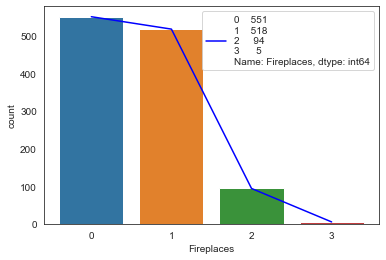

*******************************************************************************


1978.193841    64
2006.000000    52
2005.000000    51
2007.000000    40
2003.000000    37
               ..
1927.000000     1
1933.000000     1
1908.000000     1
1900.000000     1
1906.000000     1
Name: GarageYrBlt, Length: 98, dtype: int64


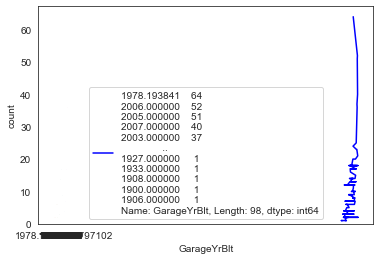

*******************************************************************************


2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64


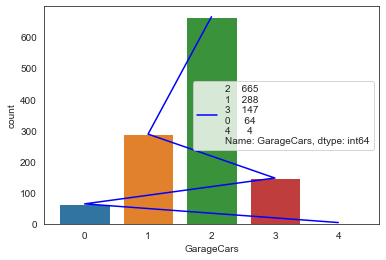

*******************************************************************************


0       64
440     44
576     39
240     31
528     26
        ..
566      1
562      1
558      1
554      1
1418     1
Name: GarageArea, Length: 392, dtype: int64


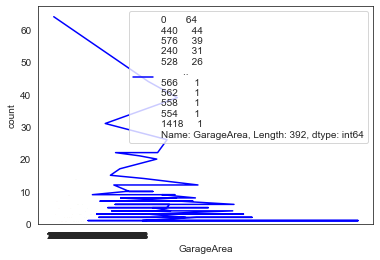

*******************************************************************************


0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64


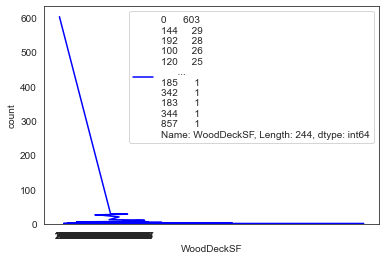

*******************************************************************************


0      531
36      24
48      18
20      17
24      14
      ... 
176      1
180      1
182      1
187      1
111      1
Name: OpenPorchSF, Length: 176, dtype: int64


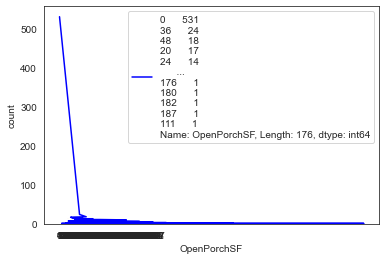

*******************************************************************************


0      999
112     13
96       6
192      5
216      5
      ... 
196      1
200      1
205      1
208      1
160      1
Name: EnclosedPorch, Length: 106, dtype: int64


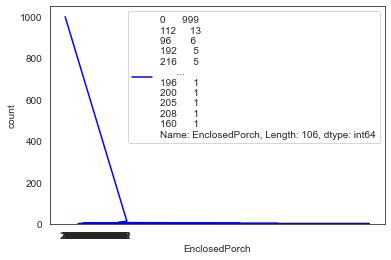

*******************************************************************************


0      1146
168       3
216       2
180       2
144       2
290       1
245       1
238       1
196       1
182       1
304       1
162       1
153       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64


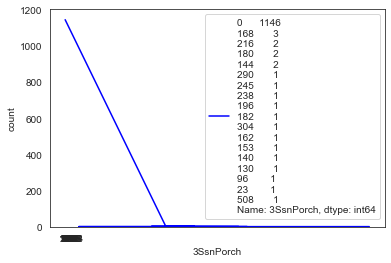

*******************************************************************************


0      1073
192       5
224       5
189       4
126       3
       ... 
178       1
440       1
170       1
165       1
175       1
Name: ScreenPorch, Length: 65, dtype: int64


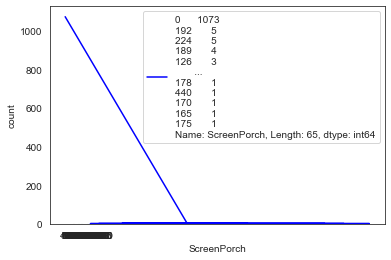

*******************************************************************************


0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64


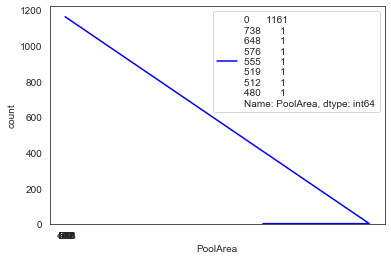

*******************************************************************************


0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64


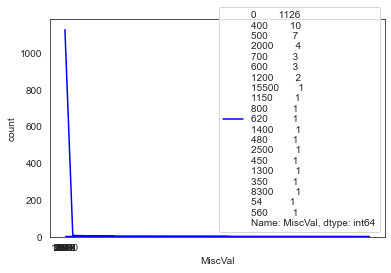

*******************************************************************************


6     203
7     187
5     166
4     113
8      95
3      87
11     67
10     66
9      57
12     46
1      44
2      37
Name: MoSold, dtype: int64


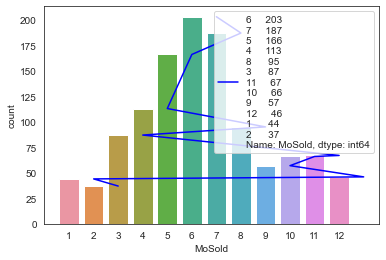

*******************************************************************************


2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64


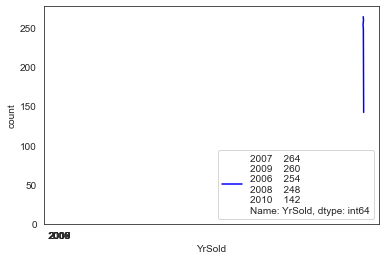

*******************************************************************************


140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64


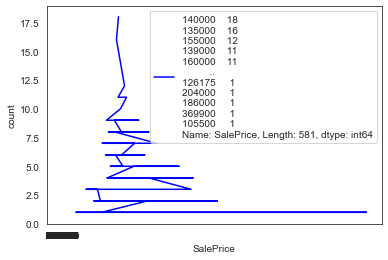

*******************************************************************************




In [26]:
def value_counts(data):
    s=df_train.columns
    for i in s:
        if df_train[i].dtype!='object':
            sns.set_style('white')  #darkgrid
            a=df_train[i].value_counts()
            print(a)
            sns.countplot(x=df_train[i],data=df_train)
            plt.plot(a,color='b',label=a)
            plt.legend()
            plt.show()
            print("*******************************************************************************")
            print('\n')

value_counts(df_train)

# BIVARIATE ANALYSIS

In [27]:
def bia_vari(a):
    plt.figure(figsize=(8,6))
    sns.set_style('darkgrid')
    sns.lineplot(x='SalePrice',y=a,data=df_train,markers=False)
    plt.xticks(rotation=90)
    plt.show()   

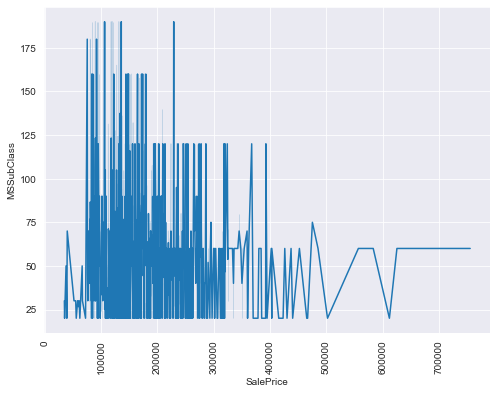

*************************************************************************************


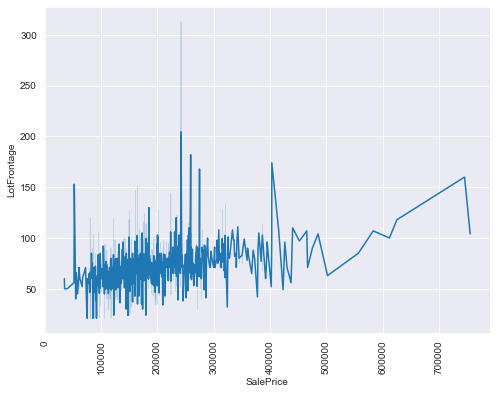

*************************************************************************************


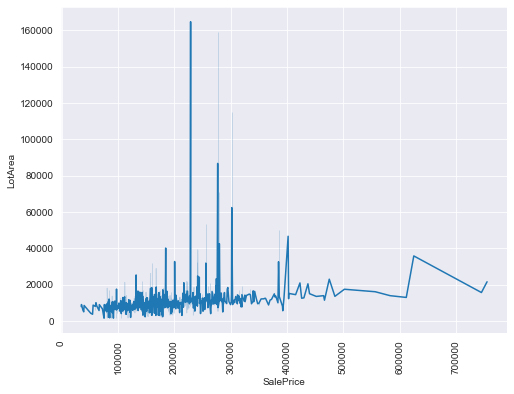

*************************************************************************************


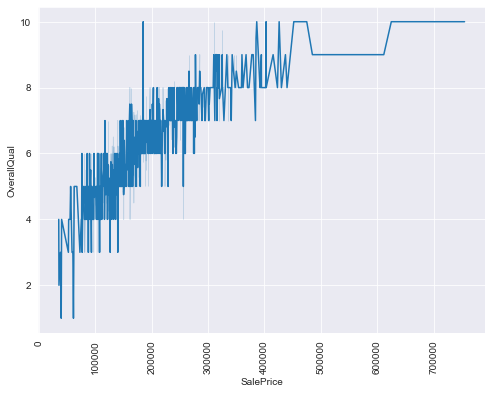

*************************************************************************************


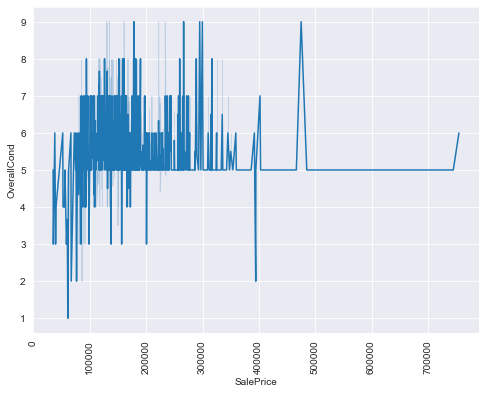

*************************************************************************************


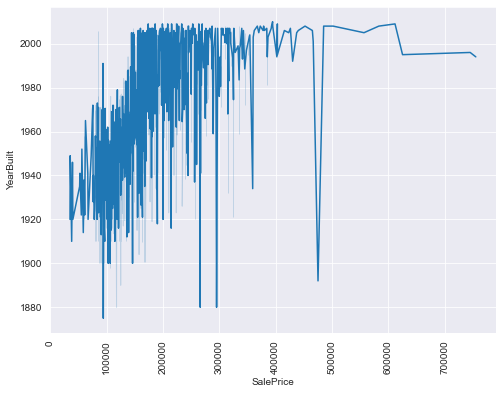

*************************************************************************************


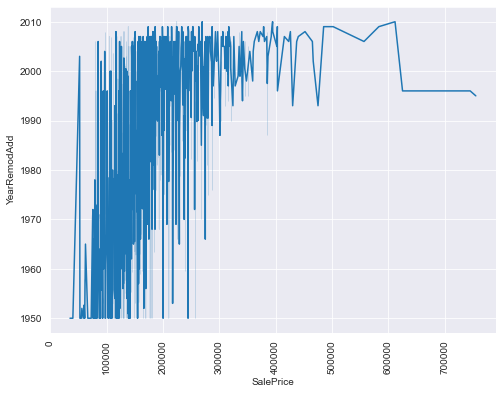

*************************************************************************************


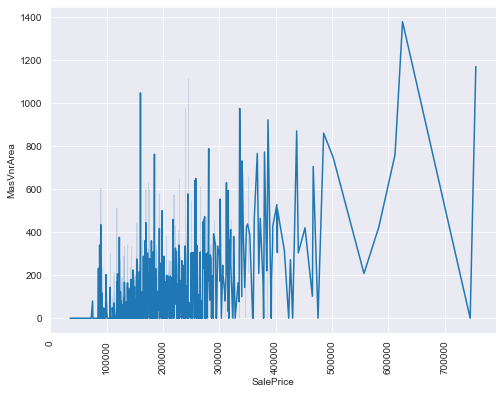

*************************************************************************************


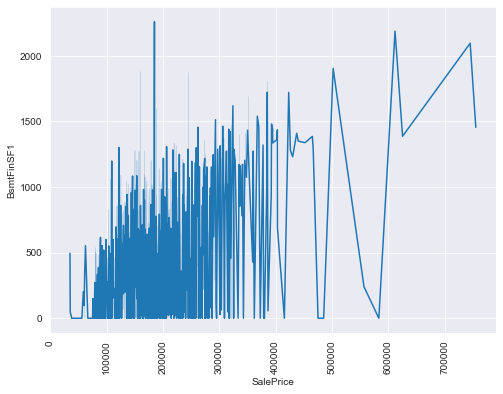

*************************************************************************************


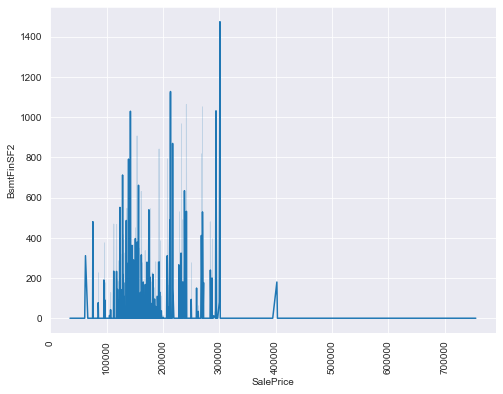

*************************************************************************************


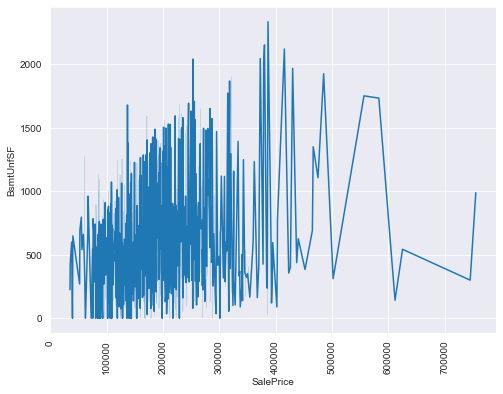

*************************************************************************************


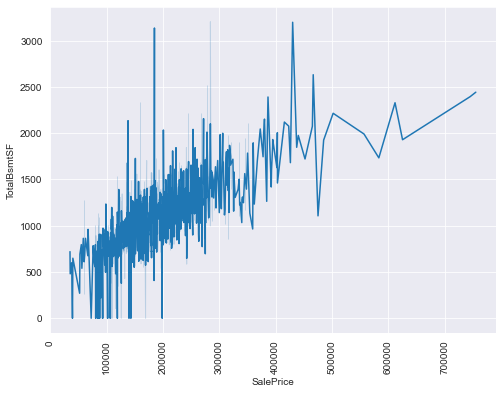

*************************************************************************************


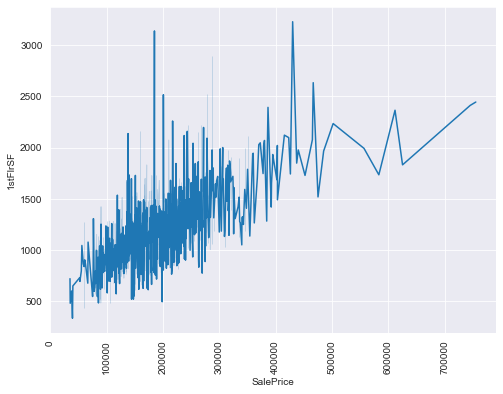

*************************************************************************************


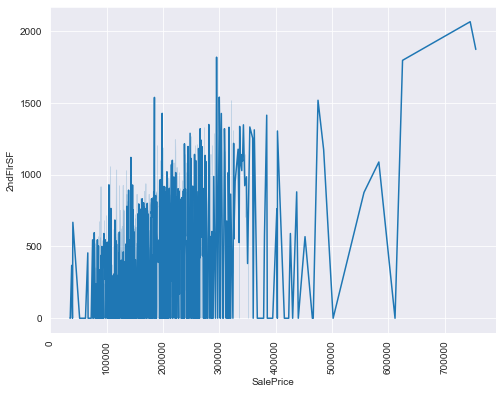

*************************************************************************************


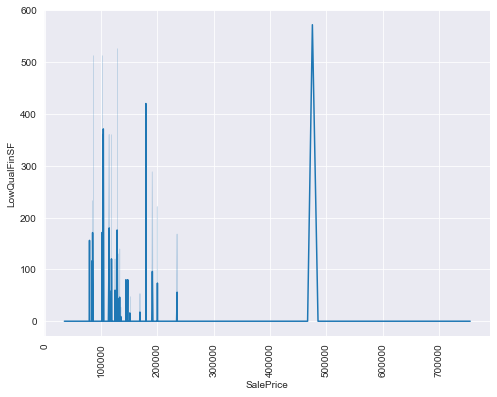

*************************************************************************************


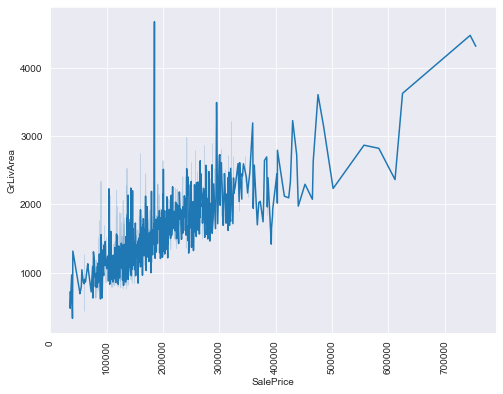

*************************************************************************************


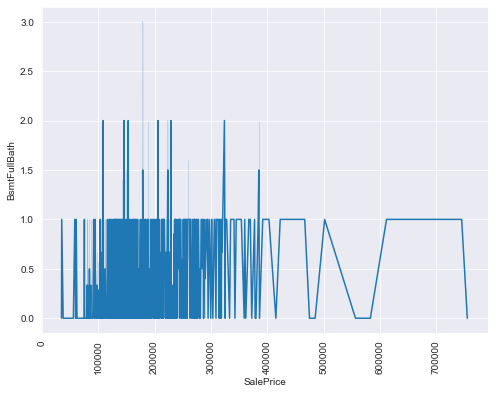

*************************************************************************************


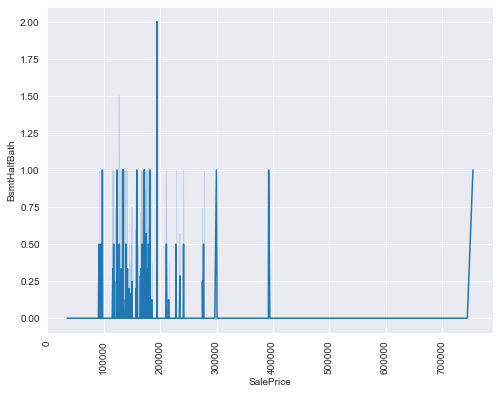

*************************************************************************************


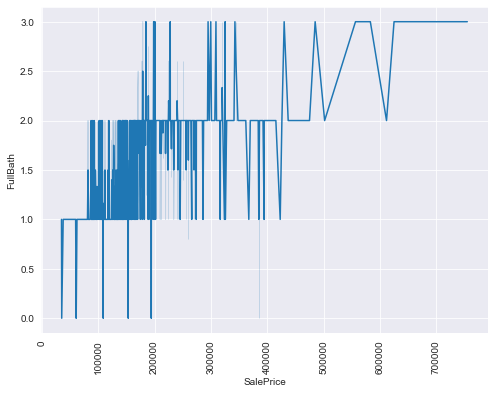

*************************************************************************************


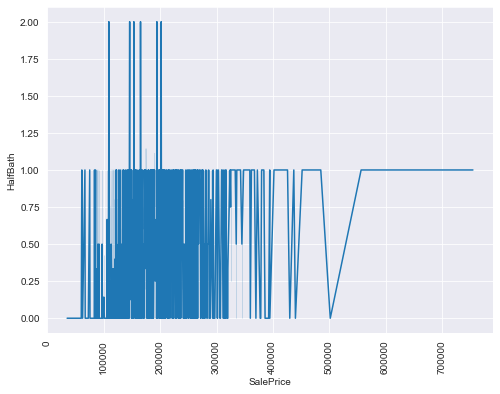

*************************************************************************************


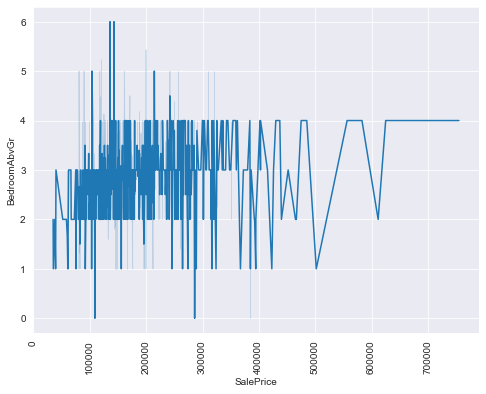

*************************************************************************************


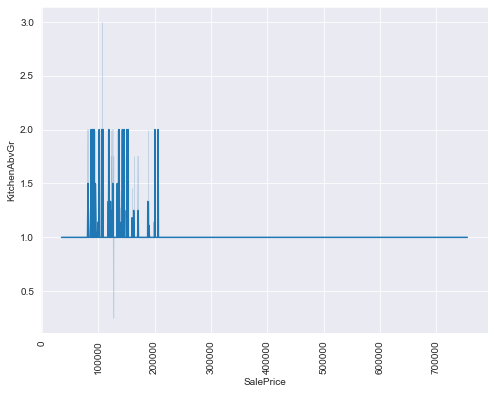

*************************************************************************************


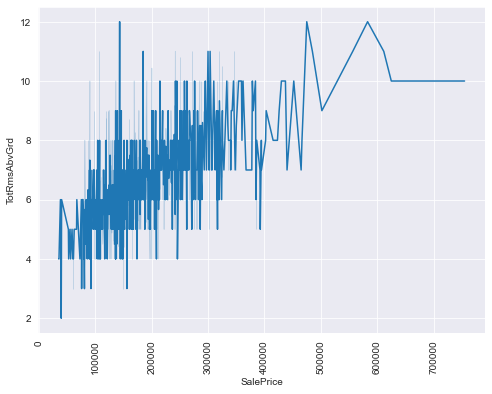

*************************************************************************************


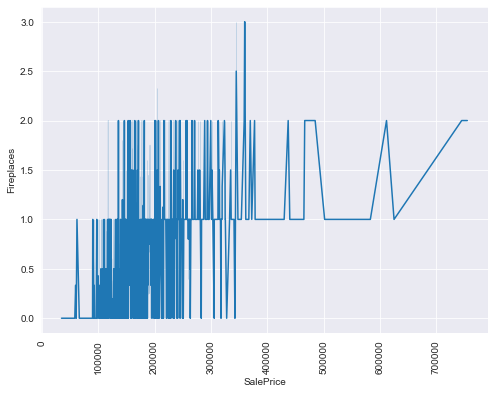

*************************************************************************************


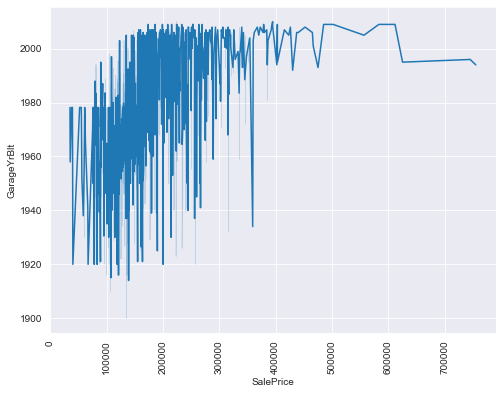

*************************************************************************************


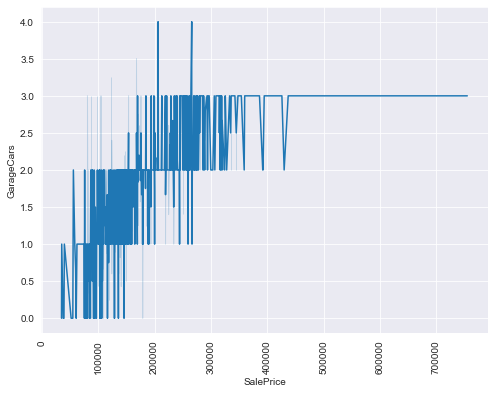

*************************************************************************************


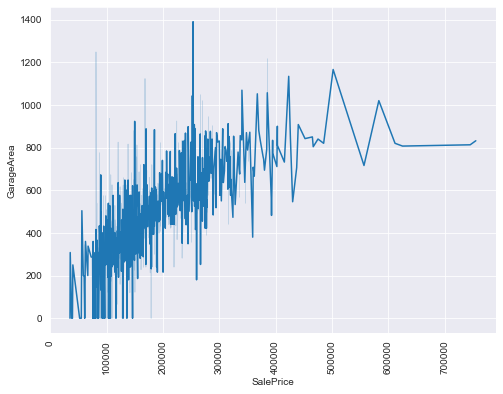

*************************************************************************************


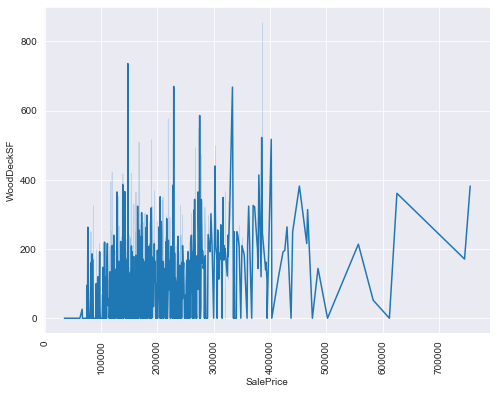

*************************************************************************************


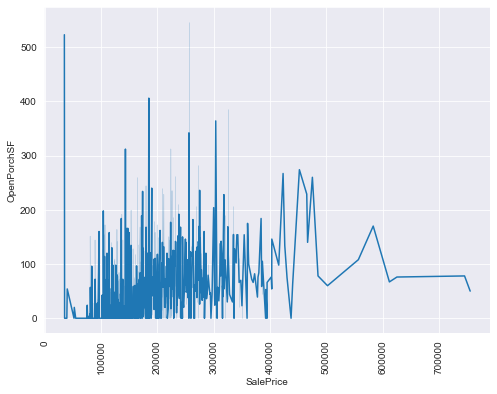

*************************************************************************************


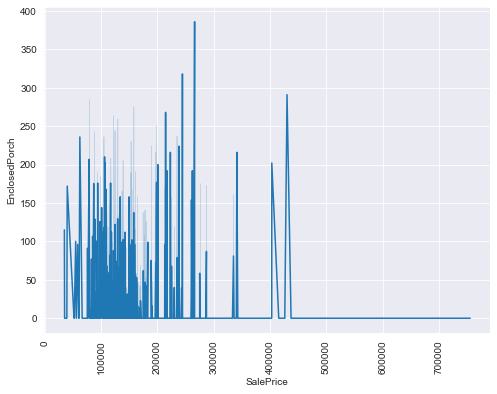

*************************************************************************************


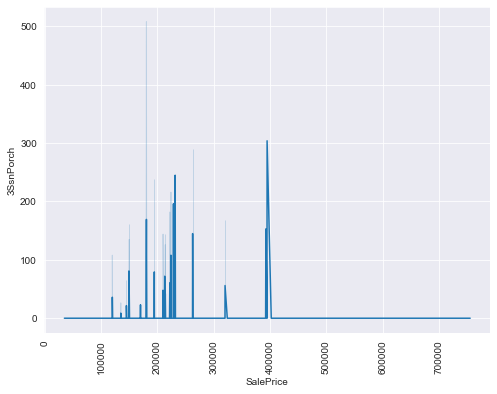

*************************************************************************************


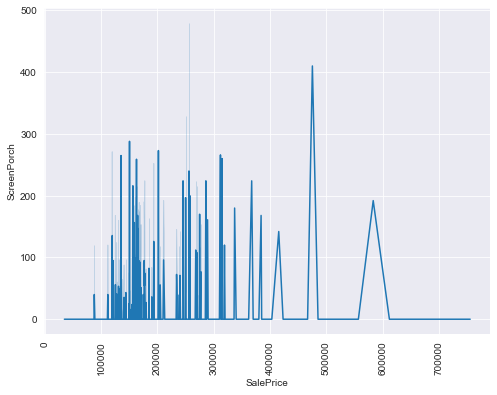

*************************************************************************************


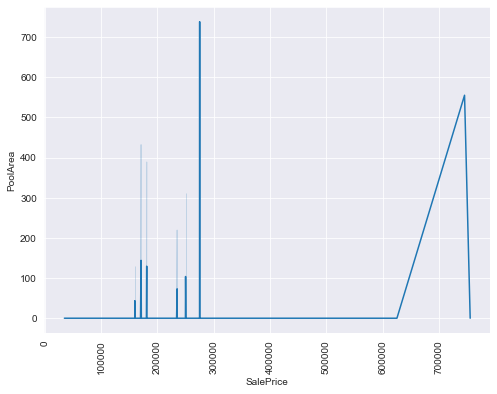

*************************************************************************************


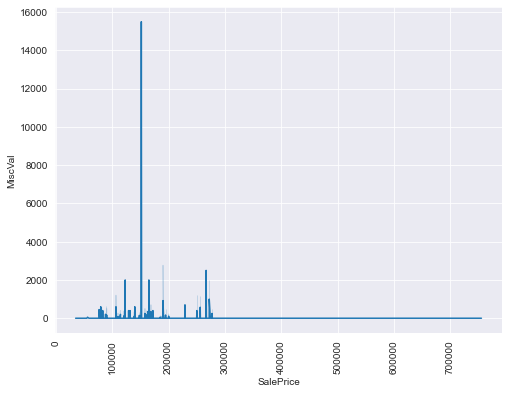

*************************************************************************************


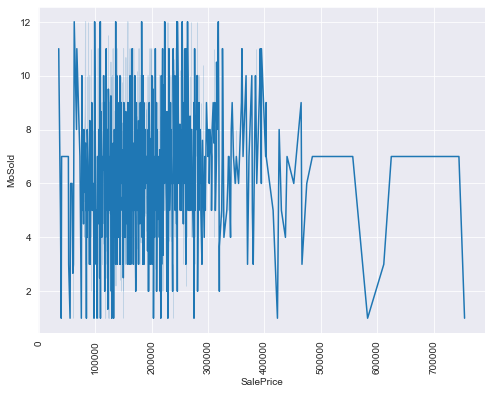

*************************************************************************************


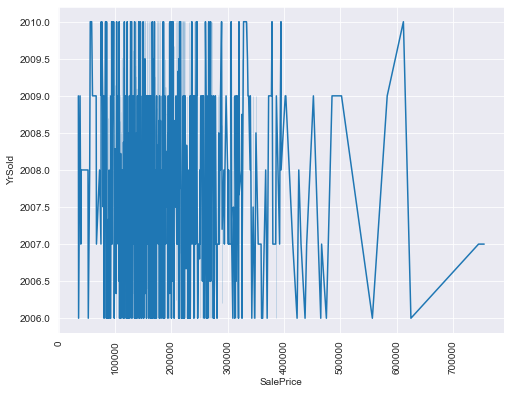

*************************************************************************************


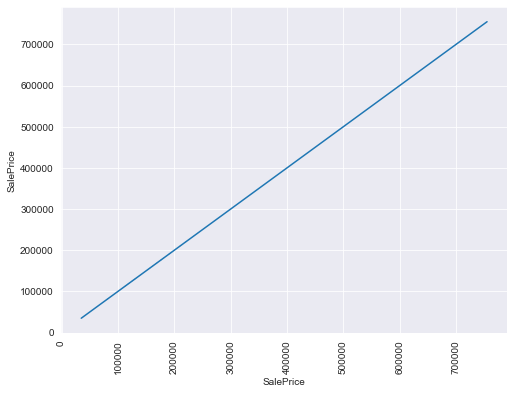

*************************************************************************************


In [28]:
d=df_train.columns
for i in d:
    if df_train[i].dtype!='object':
        bia_vari(df_train[i])
        print("*************************************************************************************")

# Checking Skewness

In [29]:
df_train.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

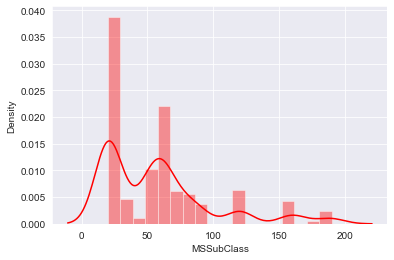

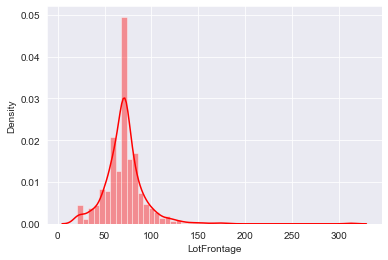

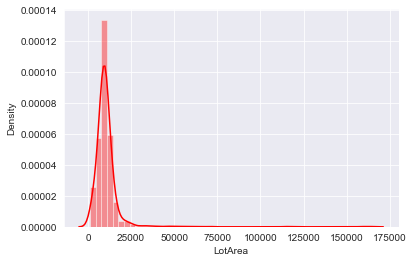

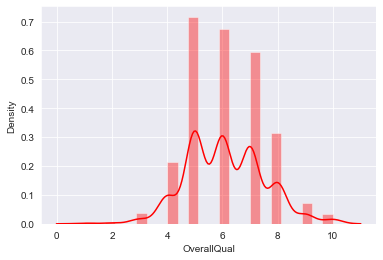

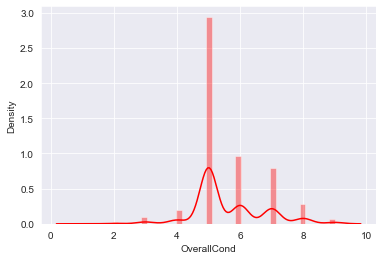

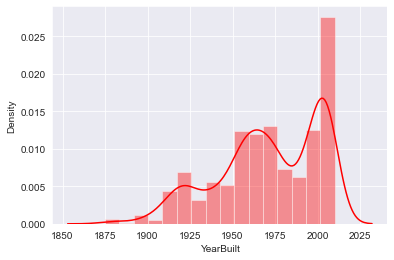

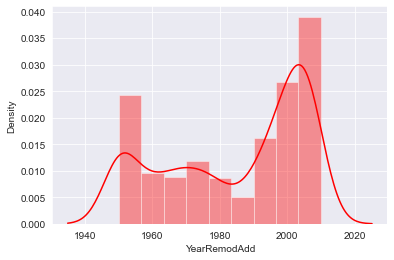

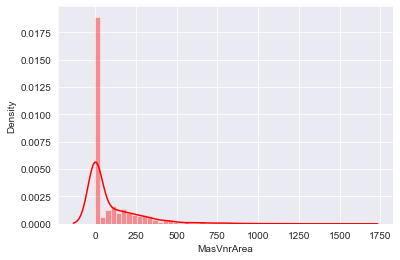

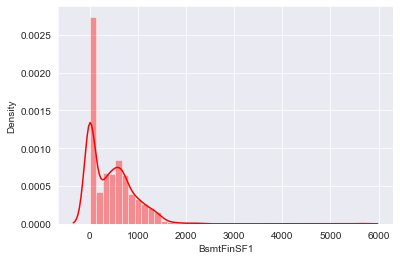

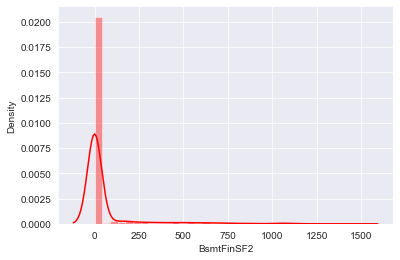

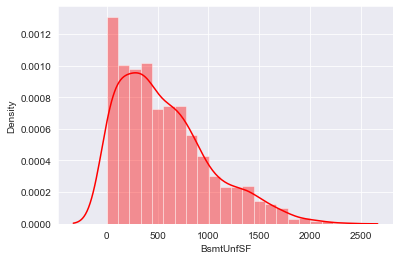

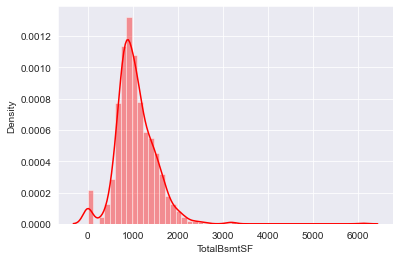

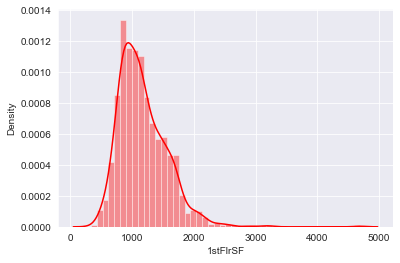

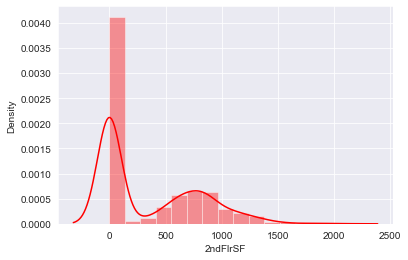

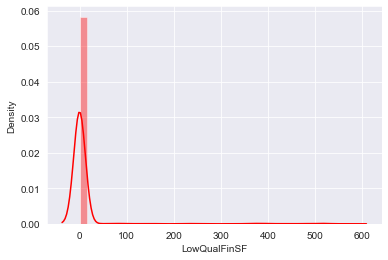

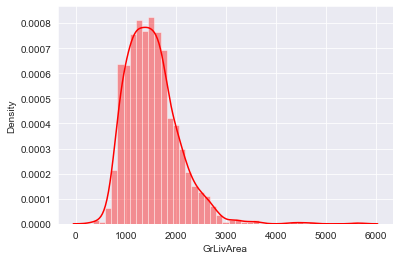

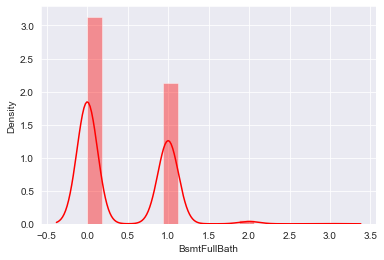

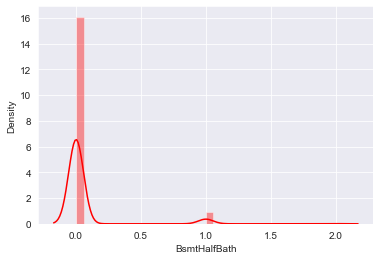

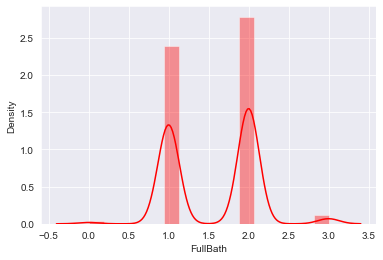

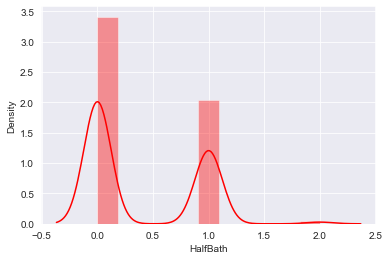

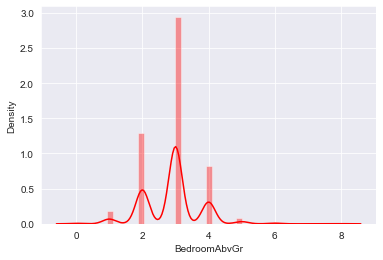

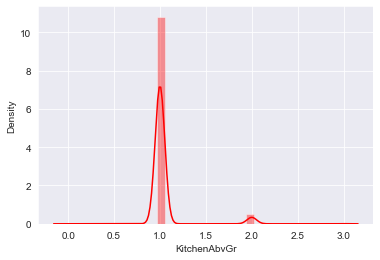

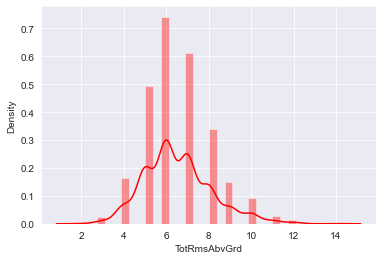

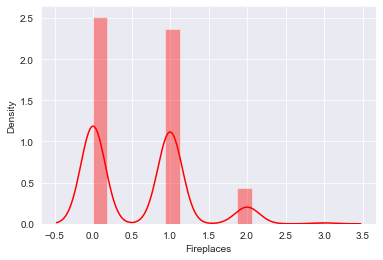

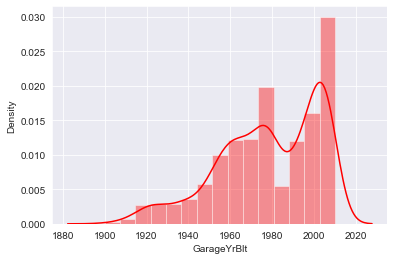

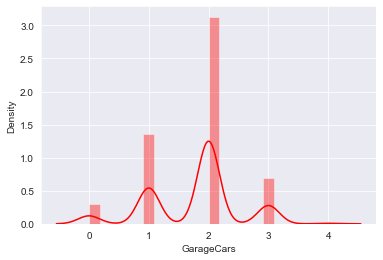

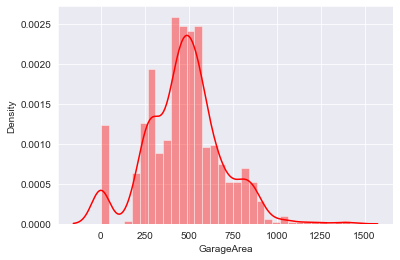

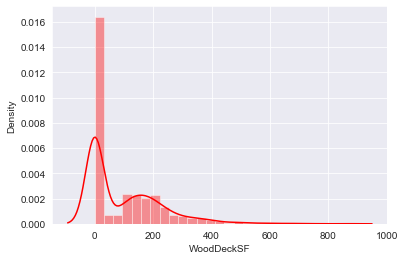

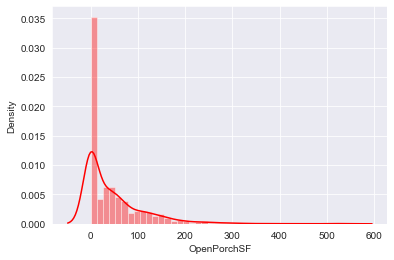

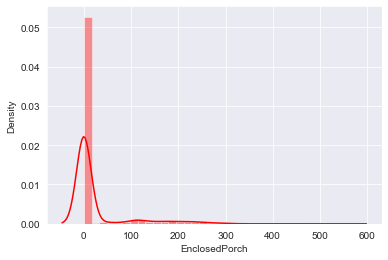

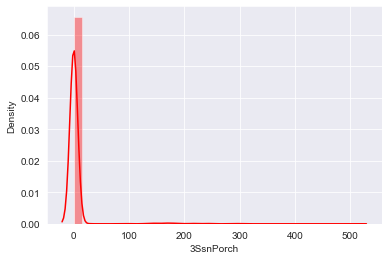

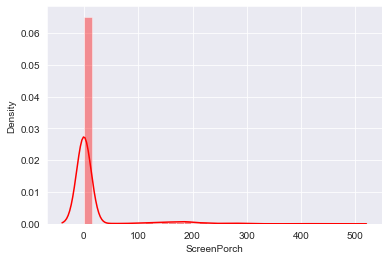

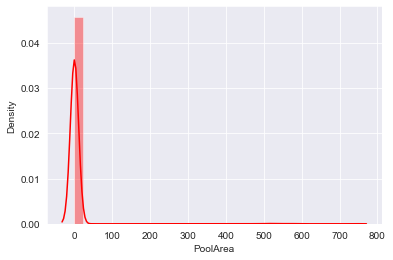

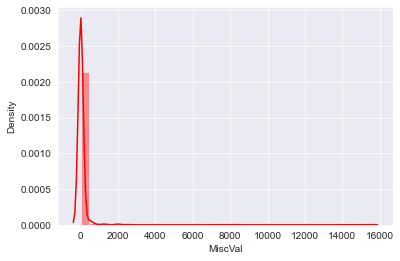

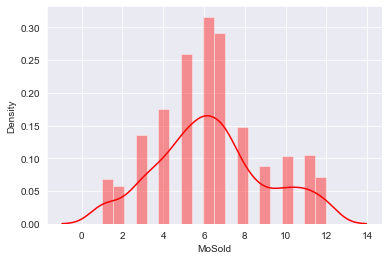

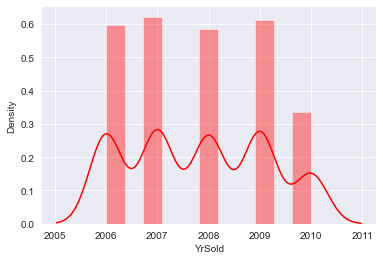

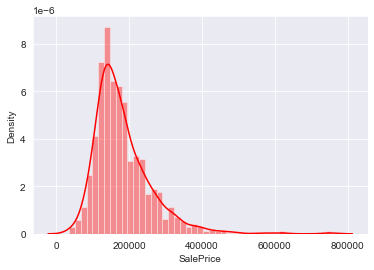

In [30]:
for i in df_train.describe().columns:
    sns.distplot(df_train[i],color='r')
    plt.show()

In [31]:
#treating skewness with square root and cube root method
for column in df_train.skew().index:
    if df_train[column].skew()>0.55:
        df_train[column]=np.sqrt(df_train[column])
    if df_train[column].skew()<-0.55:
        df_train[column]=np.cbrt(df_train[column])

In [32]:
df_train.skew()

MSSubClass        0.757142
LotFrontage       0.541796
LotArea           3.659306
OverallQual       0.175082
OverallCond       0.045434
YearBuilt        -0.597188
YearRemodAdd     -0.495864
MasVnrArea        1.075415
BsmtFinSF1       -0.011789
BsmtFinSF2        3.069103
BsmtUnfSF        -0.233752
TotalBsmtSF      -4.895100
1stFlrSF          0.686774
2ndFlrSF          0.425547
LowQualFinSF      7.716517
GrLivArea         0.627312
BsmtFullBath      0.391353
BsmtHalfBath      3.999260
FullBath          0.057809
HalfBath          0.517616
BedroomAbvGr      0.243855
KitchenAbvGr      2.709798
TotRmsAbvGrd      0.232956
Fireplaces        0.047671
GarageYrBlt      -0.678855
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.458303
OpenPorchSF       0.606878
EnclosedPorch     2.306067
3SsnPorch         7.673448
ScreenPorch       3.308386
PoolArea         12.917868
MiscVal           9.711267
MoSold            0.220979
YrSold            0.115765
SalePrice         0.943743
d

# Cheking the outliers

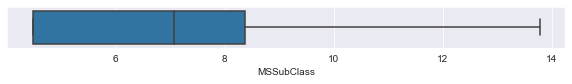

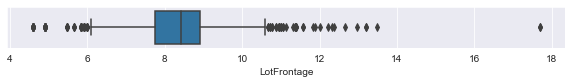

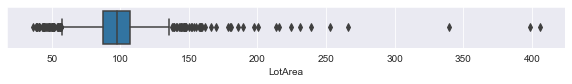

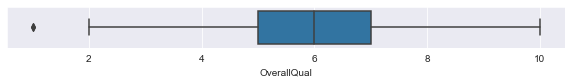

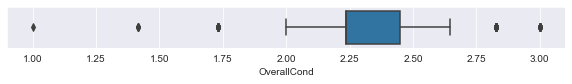

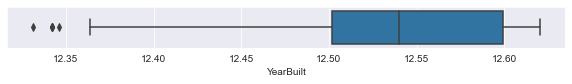

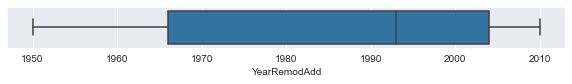

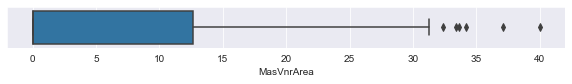

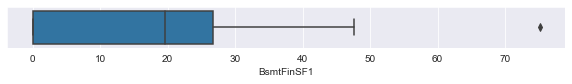

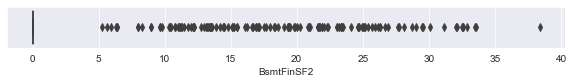

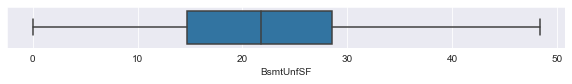

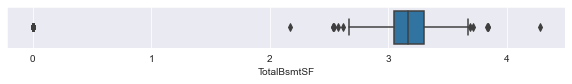

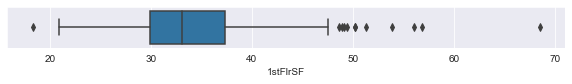

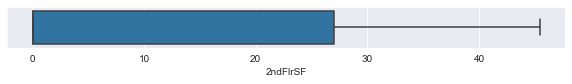

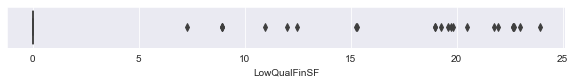

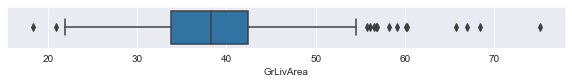

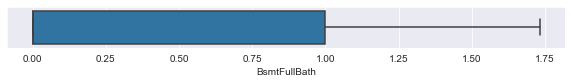

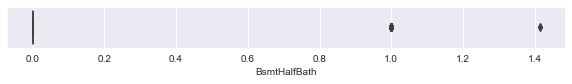

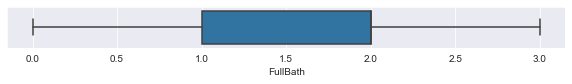

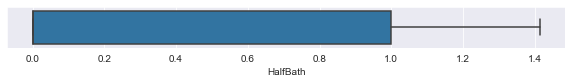

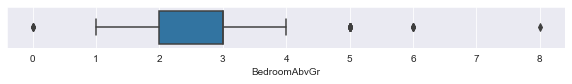

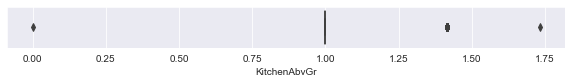

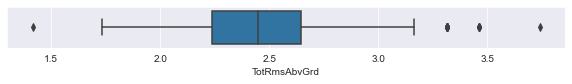

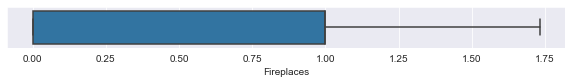

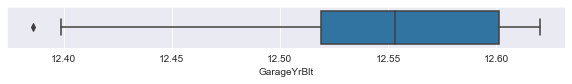

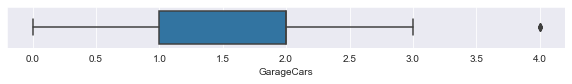

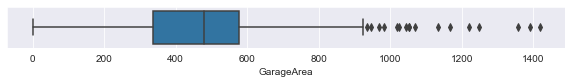

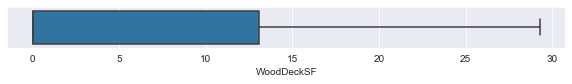

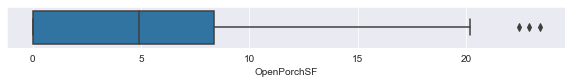

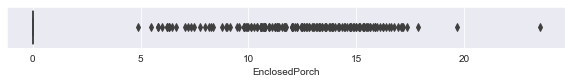

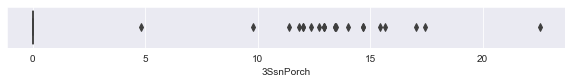

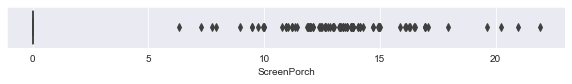

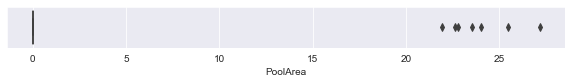

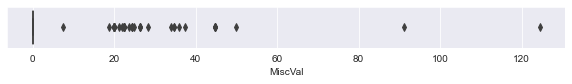

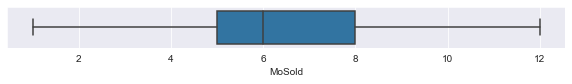

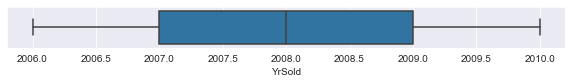

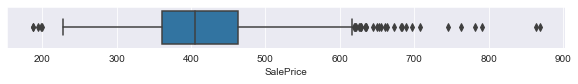

In [33]:
#checking the otlier with boxplot
d=df_train.columns
for i in d :
    if df_train[i].dtypes!="object":
        plt.figure(figsize=(10,8))
        plt.subplot(912)
        sns.boxplot(df_train[i])

Remove outliers

In [34]:
#Making function to remove the outliers with IQR hypertuning
df=df_train.copy()
Q1=df.quantile(0.010)
Q3=df.quantile(0.99)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df)-len(df_new))/len(df))*100
print(df_new.shape,df.shape)
print("Data Loss % is →→",loss_)


(1158, 80) (1168, 80)
Data Loss % is →→ 0.8561643835616438


# Data PreProcessing Train Data

In [35]:
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df_new.columns
for i in d:
    if df_new[i].dtypes=='object':
        df_new[i]=l.fit_transform(df_new[i])

In [36]:
#lets split the data
df_x1=df_new.drop(columns='SalePrice',axis=1)
y=df_new[['SalePrice']]

In [37]:
f=df_x1.columns
for i in f:
    if df_x1[i].dtypes!='object':
        if df_x1[i].skew()>0.55:
            df_x1[i]=np.sqrt(df_x1[i])


# DATA SCALING TRAIN DATASET

In [38]:
#sacalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(df_x1)
df_x=pd.DataFrame(x1,columns=df_x1.columns)
df_x.shape

(1158, 79)

# PCA TRAIN DATASET

In [39]:
#pca
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(df_x.columns))
cover_matrix.fit(df_x)


PCA(n_components=79)

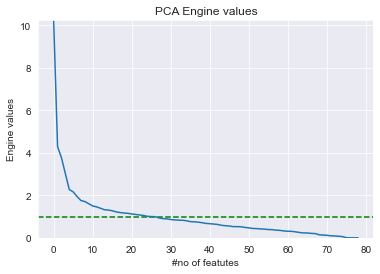

In [40]:
plt.ylabel("Engine values")
plt.xlabel("#no of featutes")
plt.title("PCA Engine values")
plt.ylim(0,max(cover_matrix.explained_variance_))
plt.axhline(y=1,color='g',linestyle='--')
plt.plot(cover_matrix.explained_variance_)
plt.show()

In [41]:
pc=PCA(n_components=20)
x1=pc.fit_transform(df_x)
df_x=pd.DataFrame(x1)

# EDA FOR TEST DATASET

In [42]:
df_test.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [43]:
df_test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL         86.0    14157   Pave   NaN      IR1   
1         120       RL          NaN     5814   Pave   NaN      IR1   
2          20       RL          NaN    11838   Pave   NaN      Reg   
3          70       RL         75.0    12000   Pave   NaN      Reg   
4          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         HLS    AllPub    Corner  ...           0        0    NaN   NaN   
1         Lvl    AllPub   CulDSac  ...           0        0    NaN   NaN   
2         Lvl    AllPub    Inside  ...           0        0    NaN   NaN   
3         Bnk    AllPub    Inside  ...           0        0    NaN   NaN   
4         Lvl    AllPub   CulDSac  ...           0        0    NaN   NaN   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0       7    2007        WD         Normal  
1         NaN       0       8    2009       COD        Abnorml  
2         NaN       0       6    2009        WD         Normal  
3         NaN       0       7    2009        WD         Normal  
4         NaN       0       1    2008        WD         Normal  

[5 rows x 79 columns]

# Checking Null Values

In [44]:
df_test.isnull().values.any()

True

Null value is present here

In [45]:
df_test.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 79, dtype: int64

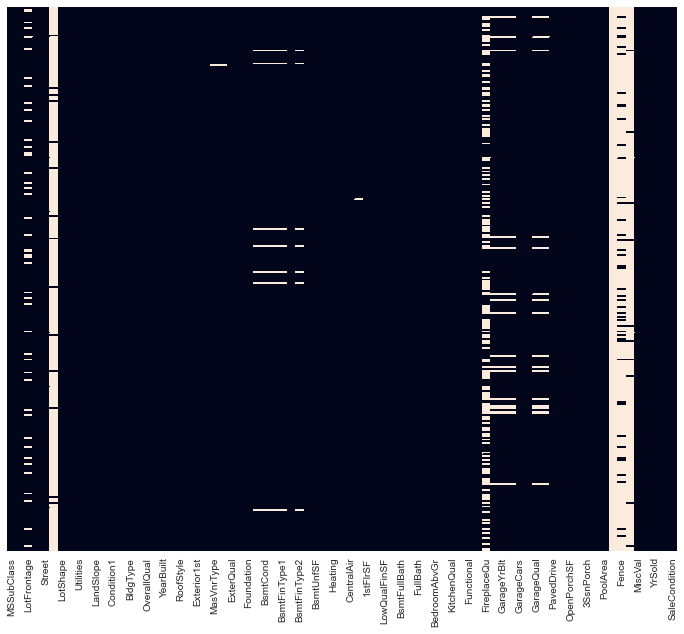

In [46]:
plt.figure(figsize=(12,10))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)
plt.show()

Now we can clearly identify that there is lots of Null values present in the Dataset

In [47]:
def Handling_Nan(df):
    N=df_test.columns
    for i in N:
        if df[i].dtype!='object':
            df[i].fillna(df[i].mean(),inplace=True)
        else:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [48]:
#calling the Function
Handling_Nan(df_test)

In [49]:
#checking the Null values Again
df_test.isnull().values.any()

True

Now we have cleared all the Null values

In [50]:
df_test.drop(columns='PoolQC',axis=1,inplace=True)

# Checking the correlation

In [51]:
dfcor=df_test.corr()
dfcor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.454786 -0.186654    -0.116077    -0.068113   
LotFrontage     -0.454786     1.000000  0.370091     0.254760    -0.096571   
LotArea         -0.186654     0.370091  1.000000     0.109161    -0.071113   
OverallQual     -0.116077     0.254760  0.109161     1.000000    -0.131891   
OverallCond     -0.068113    -0.096571 -0.071113    -0.131891     1.000000   
YearBuilt        0.041932     0.146961  0.037757     0.560092    -0.366830   
YearRemodAdd    -0.023317     0.056610 -0.022957     0.528983     0.045747   
MasVnrArea       0.002757     0.136119  0.062943     0.423976    -0.082436   
BsmtFinSF1      -0.142908     0.152566  0.209632     0.328421    -0.126968   
BsmtFinSF2      -0.079328     0.245209  0.277855    -0.139583     0.021459   
BsmtUnfSF       -0.169129     0.161516 -0.029717     0.306051    -0.095575   
TotalBsmtSF     -0.336822     0.398795  0.283111     0.578468    -0.213289   
1stFlrSF        -0.350270     0.463473  0.286714     0.553431    -0.197177   
2ndFlrSF         0.338926    -0.014547  0.030128     0.205253    -0.006572   
LowQualFinSF     0.012343     0.202729  0.030371     0.016101    -0.071717   
GrLivArea        0.030615     0.333808  0.231721     0.565494    -0.151462   
BsmtFullBath    -0.000676     0.085464  0.212162     0.150559    -0.121640   
BsmtHalfBath    -0.041577    -0.044632  0.020883    -0.076885     0.230622   
FullBath         0.095903     0.227718  0.141118     0.558577    -0.288175   
HalfBath         0.213601     0.036555  0.034980     0.177858    -0.103079   
BedroomAbvGr    -0.061750     0.227534  0.134990     0.108994    -0.061694   
KitchenAbvGr     0.275461    -0.011201 -0.030264    -0.205815    -0.128606   
TotRmsAbvGrd     0.002973     0.328972  0.211624     0.409677    -0.133094   
Fireplaces      -0.084663     0.255314  0.250416     0.425392    -0.071834   
GarageYrBlt      0.107969     0.110970  0.000671     0.548402    -0.319656   
GarageCars      -0.086798     0.306181  0.154919     0.618763    -0.291486   
GarageArea      -0.122536     0.317132  0.152737     0.542729    -0.269860   
WoodDeckSF       0.028190     0.006654  0.059117     0.288506    -0.078167   
OpenPorchSF     -0.097449     0.075946  0.067269     0.175569    -0.065010   
EnclosedPorch   -0.047570    -0.060176 -0.055667    -0.195240     0.137325   
3SsnPorch       -0.045672     0.111523  0.007832    -0.031605    -0.038308   
ScreenPorch     -0.072139     0.068553  0.090367     0.086383    -0.003167   
PoolArea              NaN          NaN       NaN          NaN          NaN   
MiscVal          0.137542     0.031567 -0.020398    -0.099852     0.019495   
MoSold          -0.004079    -0.045333 -0.034709    -0.008545    -0.043722   
YrSold           0.044441     0.059745  0.041735     0.061736    -0.001908   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.041932     -0.023317    0.002757   -0.142908   -0.079328   
LotFrontage     0.146961      0.056610    0.136119    0.152566    0.245209   
LotArea         0.037757     -0.022957    0.062943    0.209632    0.277855   
OverallQual     0.560092      0.528983    0.423976    0.328421   -0.139583   
OverallCond    -0.366830      0.045747   -0.082436   -0.126968    0.021459   
YearBuilt       1.000000      0.593138    0.284245    0.343374   -0.140391   
YearRemodAdd    0.593138      1.000000    0.168961    0.191460   -0.170299   
MasVnrArea      0.284245      0.168961    1.000000    0.254566   -0.101801   
BsmtFinSF1      0.343374      0.191460    0.254566    1.000000   -0.040759   
BsmtFinSF2     -0.140391     -0.170299   -0.101801   -0.040759    1.000000   
BsmtUnfSF       0.122930      0.211142    0.136378   -0.474047   -0.189330   
TotalBsmtSF     0.416016      0.336976    0.353040    0.538182    0.134576   
1stFlrSF        0.299125      0.274479    0.369082    0.446604    0.114096   
2ndFlrSF        0.005011      0.0757

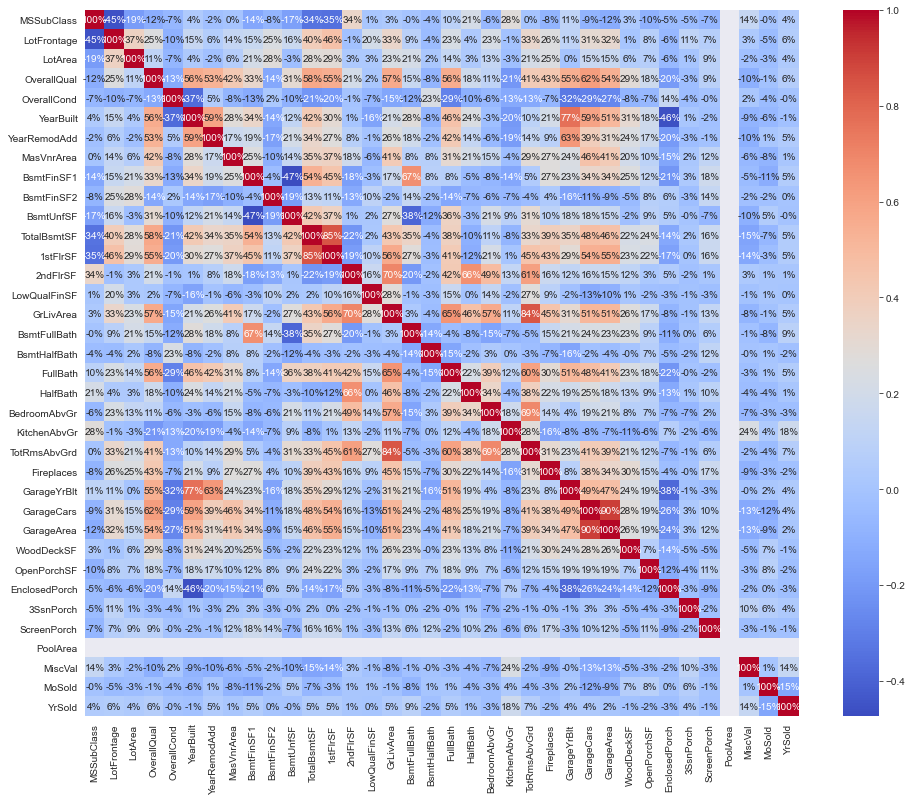

In [52]:
#Lets plot the correlation with heatmap
plt.figure(figsize=(16,13))
sns.heatmap(dfcor,annot=True,cmap="coolwarm",fmt='.0%')
plt.show()

# Remove Skewness

In [53]:
#treating skewness with square root and cube root method
for column in df_test.skew().index:
    if df_test[column].skew()>0.55:
        df_test[column]=np.sqrt(df[column])
    if df_test[column].skew()<-0.55:
        df_test[column]=np.cbrt(df[column])

In [54]:
df_test.skew()

MSSubClass       0.574400
LotFrontage      0.466813
LotArea          1.476365
OverallQual      0.397312
OverallCond     -0.266334
YearBuilt       -0.437231
YearRemodAdd    -0.535600
MasVnrArea       0.698700
BsmtFinSF1      -0.427525
BsmtFinSF2       2.183374
BsmtUnfSF       -2.229563
TotalBsmtSF      0.519257
1stFlrSF         0.117022
2ndFlrSF         0.525660
LowQualFinSF     5.460715
GrLivArea        0.196977
BsmtFullBath     0.463685
BsmtHalfBath     3.932772
FullBath        -0.049800
HalfBath         0.528474
BedroomAbvGr     0.075315
KitchenAbvGr     6.305178
TotRmsAbvGrd     0.076906
Fireplaces       0.540164
GarageYrBlt     -0.618676
GarageCars      -0.280324
GarageArea       0.133547
WoodDeckSF       0.149372
OpenPorchSF      0.177125
EnclosedPorch    1.766646
3SsnPorch        4.923470
ScreenPorch      2.969361
PoolArea         0.000000
MiscVal          5.604443
MoSold           0.186504
YrSold           0.018412
dtype: float64

# Remove the outliers

In [55]:
#removing the Outliers from Test dataset
#Making function to remove the outliers with IQR hypertuning
df5=df_test.copy()
Q1=df5.quantile(0.010)
Q3=df5.quantile(0.99)
IQR=Q3-Q1
df5_test=df5[~((df5<(Q1-1.5*IQR))|(df5>(Q3+1.5*IQR))).any(axis=1)]
loss_=((len(df5)-len(df5_test))/len(df5))*100
print(df5_test.shape,df5.shape)
print("Data Loss % is →→",loss_)

(292, 78) (292, 78)
Data Loss % is →→ 0.0


In [56]:
#encoding the objective data of test dataset
#label encoder
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
d=df5_test.columns
for i in d:
    if df5_test[i].dtypes=='object':
        df5_test[i]=l.fit_transform(df5_test[i])

In [57]:
#sacalling the data of test Dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x6=sc.fit_transform(df5_test)
df5_test_new_x=pd.DataFrame(x6,columns=df5_test.columns)
df5_test_new_x.shape

(292, 78)

In [58]:
pc=PCA(n_components=20)
x7=pc.fit_transform(df5_test_new_x)
df_x_test2=pd.DataFrame(x7)

# CREATION A MODEL

In [59]:
#In this data set we know that out target variable Saleprice is continuous so we are going to take Linear regresson
#lets make a function for getting the best random_satae for a model toget better accuracy(r2_score)
import math
final_random_state=[]
regressor=[]
Highest_acc=[]
MSE=[]
MAE=[]
RMSE=[]
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
def max_r2score(rgr,x,y):
    max_acc=0
    for rd in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20)
        rgr.fit(x_train,y_train)
        prd=rgr.predict(x_test)
        acc=r2_score(y_test,prd)
        if acc>max_acc:
            max_acc=acc
            final_rd=rd
    mse=mean_squared_error(y_test,prd)#mean_squared_error
    mae=mean_absolute_error(y_test,prd)#mean_absolute_error
    rmse=math.sqrt(mse)#Root Mean Square Error
    print("max ccuracy score coresponding to ",final_rd,"♫is♫",max_acc*100)
    print("Mean_Squared_Error is: ",mse)
    print("Mean_Absolute_Error is: ",mae)
    print("Root Mean_Squared_Error is: ",rmse)
    final_random_state.append(final_rd)
    regressor.append(rgr)
    Highest_acc.append(max_acc*100)
    MSE.append(mse)
    MAE.append(mae)
    RMSE.append(rmse)
    return final_rd 

In [60]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()

In [61]:
max_r2score(lnr,df_x,y)

max ccuracy score coresponding to  91 ♫is♫ 89.49746869008519
Mean_Squared_Error is:  682.6250382617425
Mean_Absolute_Error is:  20.308354658694576
Root Mean_Squared_Error is:  26.127093949801278


91

In [62]:
from sklearn.model_selection import learning_curve
def lnc(model,g):
    x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=g,test_size=0.20)
    lc=learning_curve(model,x_train,y_train,cv=10)
    size=lc[0]
    train_score=[lc[1][i].mean() for i in range (0,5)]
    test_score=[lc[2][i].mean() for i in range (0,5)]
    fig=plt.figure(figsize=(12,8))
    plt.plot(size,train_score,color="red")
    plt.plot(size,test_score,color="blue")

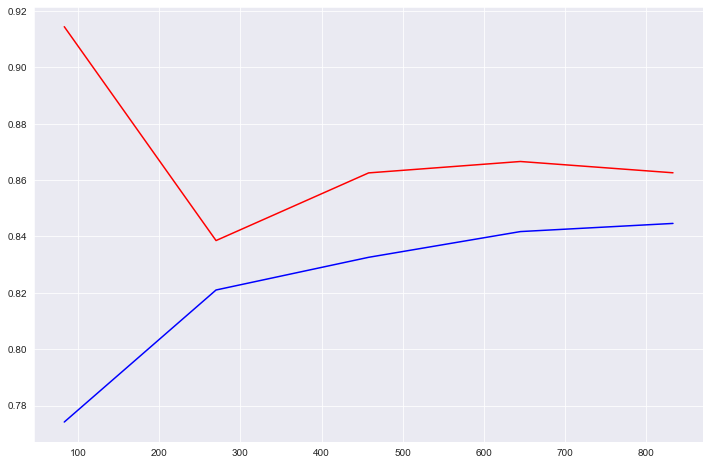

In [63]:
lnc(lnr,91)

In [64]:
#lets make a function for cross_val_score
cvs=[]
from sklearn.model_selection import cross_val_score   
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())
    cvs.append(c.mean())

In [65]:
k(lnr,df_x,y)

mean accuracy score for  LinearRegression() 0.8618481929250843
Standard deviation  in accuracy score for  LinearRegression() 0.024866825578987988

******************************************************
After seen the cross validation score of LinearRegression() the accuracy score mean is 0.8618481929250843


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={"n_neighbors":range(1,100,2)}
def grid(algoritrhm,params):
    greg=GridSearchCV(algoritrhm,params,cv=5,scoring="r2")
    greg.fit(df_x,y)
    print(greg.best_params_)
    print("*******************************")
grid(kn,parameters)

{'n_neighbors': 7}
*******************************


In [67]:
kn=KNeighborsRegressor(n_neighbors=7)
max_r2score(kn,df_x,y)

max ccuracy score coresponding to  80 ♫is♫ 85.64025026716118
Mean_Squared_Error is:  1076.8086497744725
Mean_Absolute_Error is:  22.88463491376067
Root Mean_Squared_Error is:  32.81476268045333


80

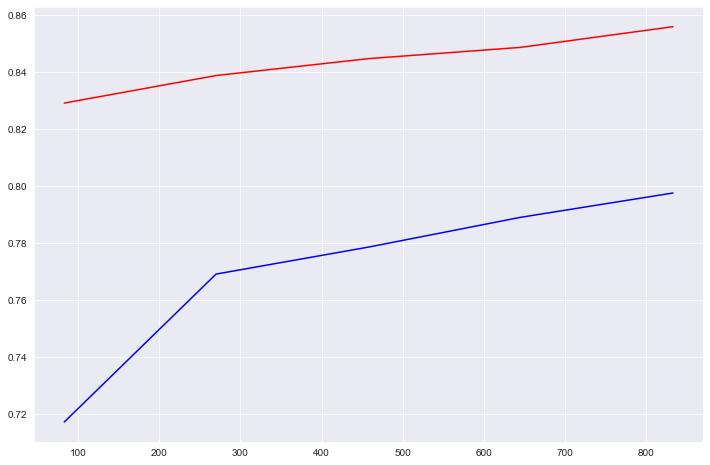

In [68]:
lnc(kn,80)

In [69]:
k(kn,df_x,y)

mean accuracy score for  KNeighborsRegressor(n_neighbors=7) 0.8117970960811292
Standard deviation  in accuracy score for  KNeighborsRegressor(n_neighbors=7) 0.014491206484974003

******************************************************
After seen the cross validation score of KNeighborsRegressor(n_neighbors=7) the accuracy score mean is 0.8117970960811292


In [70]:
from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear","poly","rbf"],"C":[0.0001,0.001,0.01,0.1,1.0]}
grid(svr,parameters)

{'C': 1.0, 'kernel': 'linear'}
*******************************


In [71]:
sv=SVR(kernel="linear",C=1.0)
max_r2score(sv,df_x,y)

max ccuracy score coresponding to  91 ♫is♫ 89.34362950318993
Mean_Squared_Error is:  683.0684252335416
Mean_Absolute_Error is:  19.867175593093087
Root Mean_Squared_Error is:  26.13557776735654


91

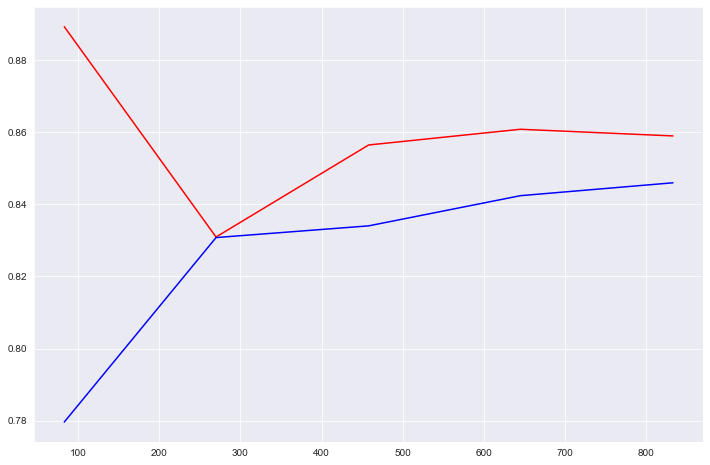

In [72]:
lnc(sv,91)

In [73]:
k(sv,df_x,y)

mean accuracy score for  SVR(kernel='linear') 0.8618365063959942
Standard deviation  in accuracy score for  SVR(kernel='linear') 0.02248401097175342

******************************************************
After seen the cross validation score of SVR(kernel='linear') the accuracy score mean is 0.8618365063959942


In [74]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
la=Lasso()
rd=Ridge()
el=ElasticNet()
reg=[la,rd,el]
parameters={"alpha":[0.00001,0.0001,0.001,0.01,0.1,1.0]}
for i in reg:
    print(i)
    grid(i,parameters)

Lasso()
{'alpha': 0.1}
*******************************
Ridge()
{'alpha': 1.0}
*******************************
ElasticNet()
{'alpha': 0.1}
*******************************


In [76]:
la=Lasso(alpha=0.1)
max_r2score(la,df_x,y)

max ccuracy score coresponding to  91 ♫is♫ 89.4796107171966
Mean_Squared_Error is:  681.6955664438642
Mean_Absolute_Error is:  20.311843968329654
Root Mean_Squared_Error is:  26.109300382121774


91

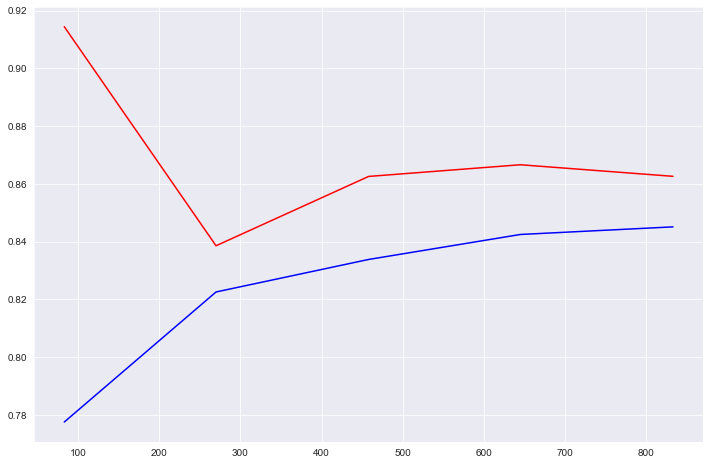

In [78]:
lnc(la,91)

In [79]:
k(la,df_x,y)

mean accuracy score for  Lasso(alpha=0.1) 0.862113289112802
Standard deviation  in accuracy score for  Lasso(alpha=0.1) 0.024591434798060276

******************************************************
After seen the cross validation score of Lasso(alpha=0.1) the accuracy score mean is 0.862113289112802


In [80]:
rd=Ridge(alpha=1.0)
max_r2score(la,df_x,y)

max ccuracy score coresponding to  91 ♫is♫ 89.4796107171966
Mean_Squared_Error is:  681.6955664438642
Mean_Absolute_Error is:  20.311843968329654
Root Mean_Squared_Error is:  26.109300382121774


91

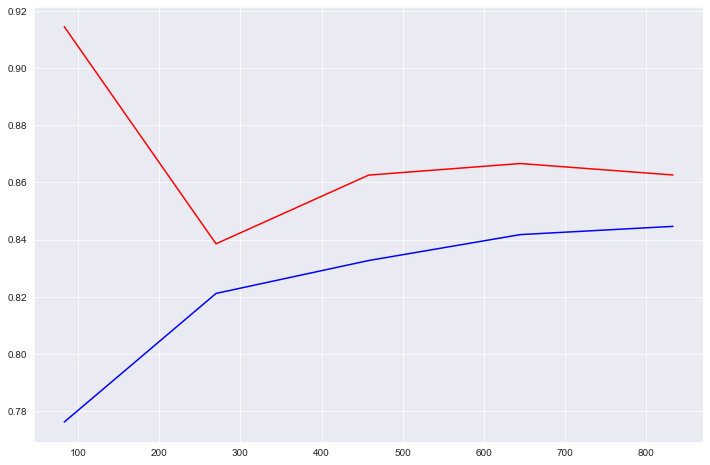

In [81]:
lnc(rd,91)

In [82]:
k(rd,df_x,y)

mean accuracy score for  Ridge() 0.8618560824799146
Standard deviation  in accuracy score for  Ridge() 0.024855213635572183

******************************************************
After seen the cross validation score of Ridge() the accuracy score mean is 0.8618560824799146


In [83]:
el=ElasticNet(alpha=0.1)
max_r2score(el,df_x,y)

max ccuracy score coresponding to  91 ♫is♫ 89.41654036412908
Mean_Squared_Error is:  683.1665682475771
Mean_Absolute_Error is:  20.27428090000013
Root Mean_Squared_Error is:  26.137455274903427


91

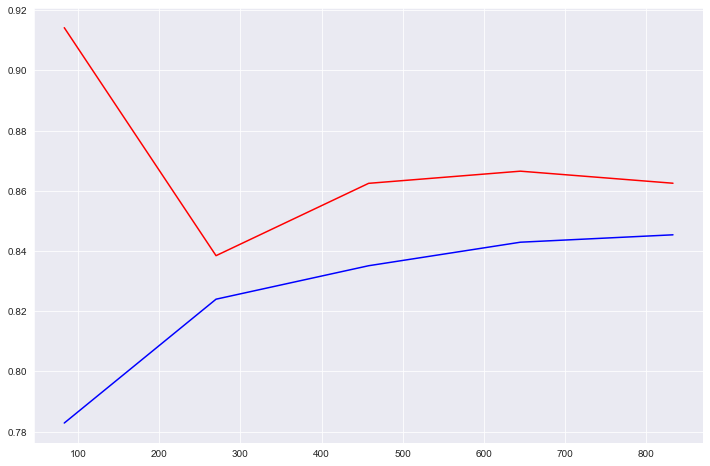

In [84]:
lnc(el,91)

In [85]:
k(el,df_x,y)

mean accuracy score for  ElasticNet(alpha=0.1) 0.8622274128845868
Standard deviation  in accuracy score for  ElasticNet(alpha=0.1) 0.02422829693420083

******************************************************
After seen the cross validation score of ElasticNet(alpha=0.1) the accuracy score mean is 0.8622274128845868


In [86]:
from sklearn.tree import DecisionTreeRegressor
dct=DecisionTreeRegressor()
parameters={"criterion":["mse","mae","friedman_mse","poisson"],"max_depth":range(1,250,5)}
grid(dct,parameters)

{'criterion': 'mae', 'max_depth': 6}
*******************************


In [87]:
dct=DecisionTreeRegressor(criterion='friedman_mse',max_depth=6)
max_r2score(dct,df_x,y)

max ccuracy score coresponding to  89 ♫is♫ 85.18308240454556
Mean_Squared_Error is:  1699.4472481698267
Mean_Absolute_Error is:  27.96682905658735
Root Mean_Squared_Error is:  41.22435261068179


89

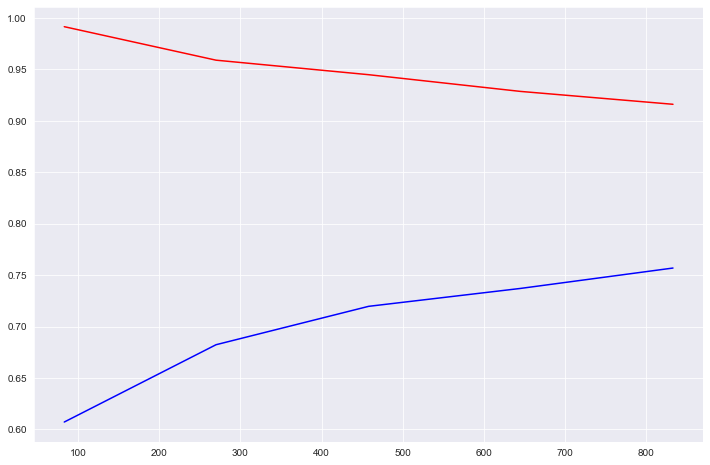

In [88]:
lnc(dct,89)

In [89]:
k(dct,df_x,y)

mean accuracy score for  DecisionTreeRegressor(criterion='friedman_mse', max_depth=6) 0.7693588660159703
Standard deviation  in accuracy score for  DecisionTreeRegressor(criterion='friedman_mse', max_depth=6) 0.015483051428628438

******************************************************
After seen the cross validation score of DecisionTreeRegressor(criterion='friedman_mse', max_depth=6) the accuracy score mean is 0.7693588660159703


In [90]:
from sklearn.ensemble import RandomForestRegressor
rnd=RandomForestRegressor()
param={"n_estimators":range(1,1000,50)}
grid(rnd,param)

{'n_estimators': 801}
*******************************


In [91]:
rnd=RandomForestRegressor(n_estimators=801)
max_r2score(rnd,df_x,y)

max ccuracy score coresponding to  87 ♫is♫ 88.85972338949666
Mean_Squared_Error is:  863.7883166838714
Mean_Absolute_Error is:  20.611012568937948
Root Mean_Squared_Error is:  29.39027588648789


87

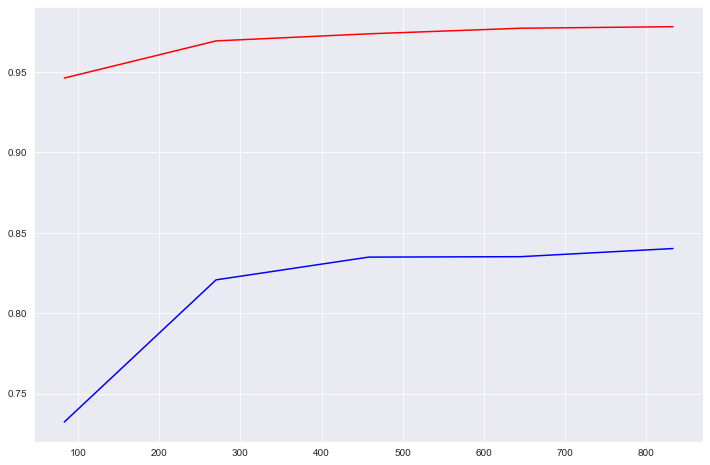

In [92]:
lnc(rnd,87)

In [93]:
k(rnd,df_x,y)

mean accuracy score for  RandomForestRegressor(n_estimators=801) 0.852387688149211
Standard deviation  in accuracy score for  RandomForestRegressor(n_estimators=801) 0.019751781590023196

******************************************************
After seen the cross validation score of RandomForestRegressor(n_estimators=801) the accuracy score mean is 0.852387688149211


In [94]:
from sklearn.ensemble import GradientBoostingRegressor
grd=GradientBoostingRegressor()

In [95]:
par={"learning_rate":[0.0001,0.001,0.01,0.1,1.0],"n_estimators":range(100,1000,50)}
grid(grd,par)

{'learning_rate': 0.01, 'n_estimators': 950}
*******************************


In [96]:
grd=GradientBoostingRegressor(learning_rate= 0.1,n_estimators= 950)
max_r2score(grd,df_x,y)

max ccuracy score coresponding to  79 ♫is♫ 89.72680990954188
Mean_Squared_Error is:  934.4127217519442
Mean_Absolute_Error is:  21.699039149386458
Root Mean_Squared_Error is:  30.56816516822598


79

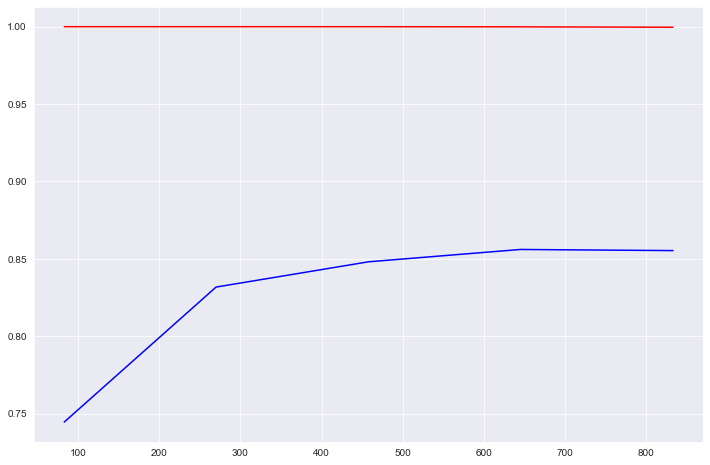

In [97]:
lnc(grd,79)

In [98]:
k(grd,df_x,y)

mean accuracy score for  GradientBoostingRegressor(n_estimators=950) 0.8530437954983785
Standard deviation  in accuracy score for  GradientBoostingRegressor(n_estimators=950) 0.020399857548534676

******************************************************
After seen the cross validation score of GradientBoostingRegressor(n_estimators=950) the accuracy score mean is 0.8530437954983785


In [99]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor()
parameters={"n_estimators":range(1,1000,100)}
grid(bg,parameters)

{'n_estimators': 601}
*******************************


In [100]:
bg=BaggingRegressor(n_estimators=601)
max_r2score(bg,df_x,y)

max ccuracy score coresponding to  87 ♫is♫ 89.06830175950967
Mean_Squared_Error is:  863.588357369412
Mean_Absolute_Error is:  20.573699931231364
Root Mean_Squared_Error is:  29.386873895829954


87

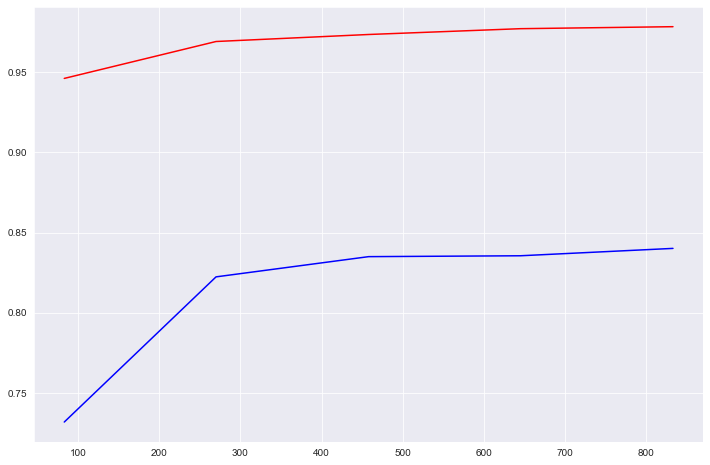

In [101]:
lnc(bg,87)

In [102]:
k(bg,df_x,y)

mean accuracy score for  BaggingRegressor(n_estimators=601) 0.852559874562747
Standard deviation  in accuracy score for  BaggingRegressor(n_estimators=601) 0.01946498340590829

******************************************************
After seen the cross validation score of BaggingRegressor(n_estimators=601) the accuracy score mean is 0.852559874562747


In [103]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
params={"n_estimators":range(1,1000,200)}
grid(ext,params)

{'n_estimators': 201}
*******************************


In [104]:
ext=ExtraTreesRegressor(n_estimators=201)
max_r2score(ext,df_x,y)

max ccuracy score coresponding to  87 ♫is♫ 89.807263230607
Mean_Squared_Error is:  786.2730471703882
Mean_Absolute_Error is:  19.62456169485535
Root Mean_Squared_Error is:  28.04056074992774


87

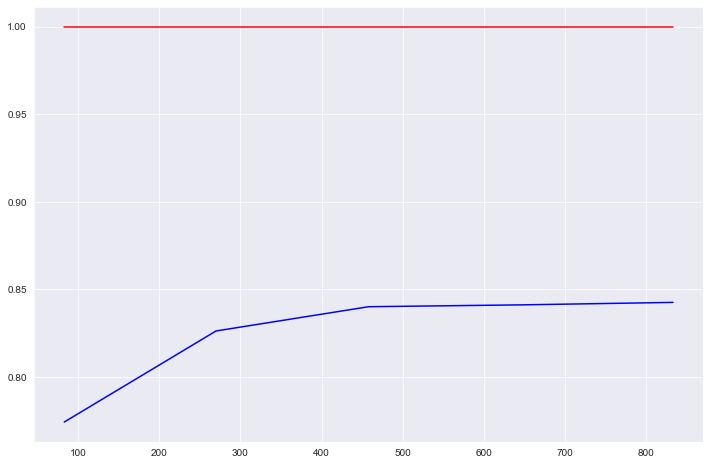

In [105]:
lnc(ext,87)

In [106]:
k(ext,df_x,y)

mean accuracy score for  ExtraTreesRegressor(n_estimators=201) 0.8520712963983585
Standard deviation  in accuracy score for  ExtraTreesRegressor(n_estimators=201) 0.022481111938201195

******************************************************
After seen the cross validation score of ExtraTreesRegressor(n_estimators=201) the accuracy score mean is 0.8520712963983585


In [107]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
params={"n_estimators":range(1,1000,200),"learning_rate":[0.0001,0.001,0.01,0.1,1.0],
        "loss":["linear","square","exponential"]}
grid(adb,params)


{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 401}
*******************************


In [108]:
adb=AdaBoostRegressor(n_estimators=401,learning_rate=0.01,loss="exponential")
max_r2score(adb,df_x,y)

max ccuracy score coresponding to  49 ♫is♫ 83.98874115703182
Mean_Squared_Error is:  1150.7974836740195
Mean_Absolute_Error is:  25.105658096680763
Root Mean_Squared_Error is:  33.92340613314087


49

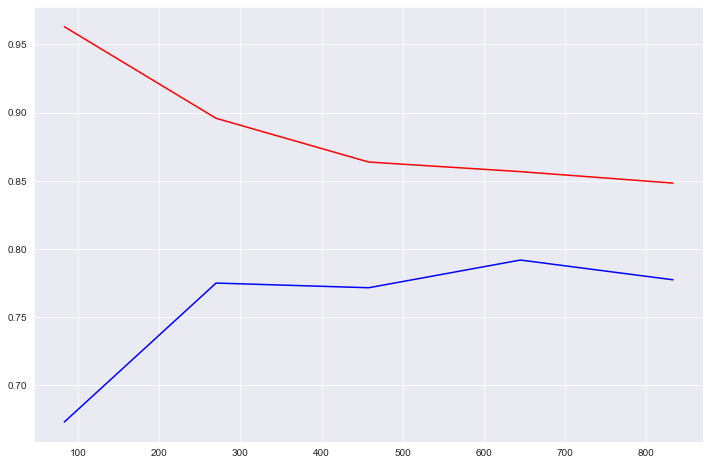

In [109]:
lnc(adb,49)

In [110]:
k(adb,df_x,y)

mean accuracy score for  AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=401) 0.7913739386747299
Standard deviation  in accuracy score for  AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=401) 0.017873203896326843

******************************************************
After seen the cross validation score of AdaBoostRegressor(learning_rate=0.01, loss='exponential', n_estimators=401) the accuracy score mean is 0.7913739386747299


In [121]:
#after seen the above table i am going to finalise my model with ExtraTreeRegressor()
#with the random sate of 68
ext=ExtraTreesRegressor(n_estimators=201)
x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=91,test_size=0.20)
ext.fit(x_train,y_train)
prd=ext.predict(x_test)
accuracy=r2_score(y_test,prd)
print(accuracy)
print("Mean_Squared_Error is: ",mean_squared_error(y_test,prd))
print("Mean_Absolute_Error is: ",mean_absolute_error(y_test,prd))
print("Root Mean_Squared_Error is: ",math.sqrt(mean_squared_error(y_test,prd)))

0.8903738391382306
Mean_Squared_Error is:  825.020106623834
Mean_Absolute_Error is:  19.79097236812842
Root Mean_Squared_Error is:  28.7231632419522


In [122]:
#lets Save The Model
import joblib #importing the joblib
joblib.dump(ext,'Housing_saleprice_prediction_.pkl')

['Housing_saleprice_prediction_.pkl']

In [123]:
#saving the predict value as csv
joblib.dump(ext,'Housing_saleprice_prediction_.csv')

['Housing_saleprice_prediction_.csv']

In [124]:
#lets call the model and test the Test data
model=joblib.load('Housing_saleprice_prediction_.csv')
model.predict(df_x_test2)

array([573.48784191, 452.95546882, 488.95819535, 367.65895807,
       488.91191308, 332.86429786, 403.39986908, 550.577538  ,
       499.25376667, 446.56261996, 321.86812125, 350.3398082 ,
       367.29589364, 449.68930379, 555.18518352, 359.70590806,
       367.9135896 , 365.35962401, 407.4086957 , 413.60702188,
       397.19103563, 384.2309748 , 390.22615891, 347.09950189,
       349.82978088, 365.32084782, 438.87270562, 357.0584061 ,
       410.46336956, 331.08515155, 374.55818816, 468.71310991,
       518.82788797, 385.98847009, 387.64218678, 417.49582504,
       418.38272666, 337.16384588, 374.90300396, 389.43583505,
       358.32083176, 491.57645433, 453.89094322, 452.65831088,
       410.72808016, 336.54387174, 335.20509994, 368.34308129,
       454.12348743, 580.70173868, 369.47775598, 465.98164125,
       324.61704293, 324.02020955, 492.9858081 , 381.36963935,
       365.22381196, 439.01888432, 418.5382658 , 503.55458829,
       330.56781716, 393.00748287, 355.68277297, 447.41